About Dataset

Problem Statement
You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information.
The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.


In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import statsmodels.api as sm
from scipy import stats


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer, StandardScaler, PowerTransformer, OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

import warnings 
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (16,12)

In [159]:
df_train = pd.read_csv('train.csv', low_memory=False)
df_test = pd.read_csv('test.csv', low_memory=False)

print('Training dataset shape: ', df_train.shape, 'Test dataset shape: ', df_test.shape)

Training dataset shape:  (100000, 28) Test dataset shape:  (50000, 27)


In [160]:
pd.set_option('display.max_columns', None)
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [161]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [162]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


<AxesSubplot:>

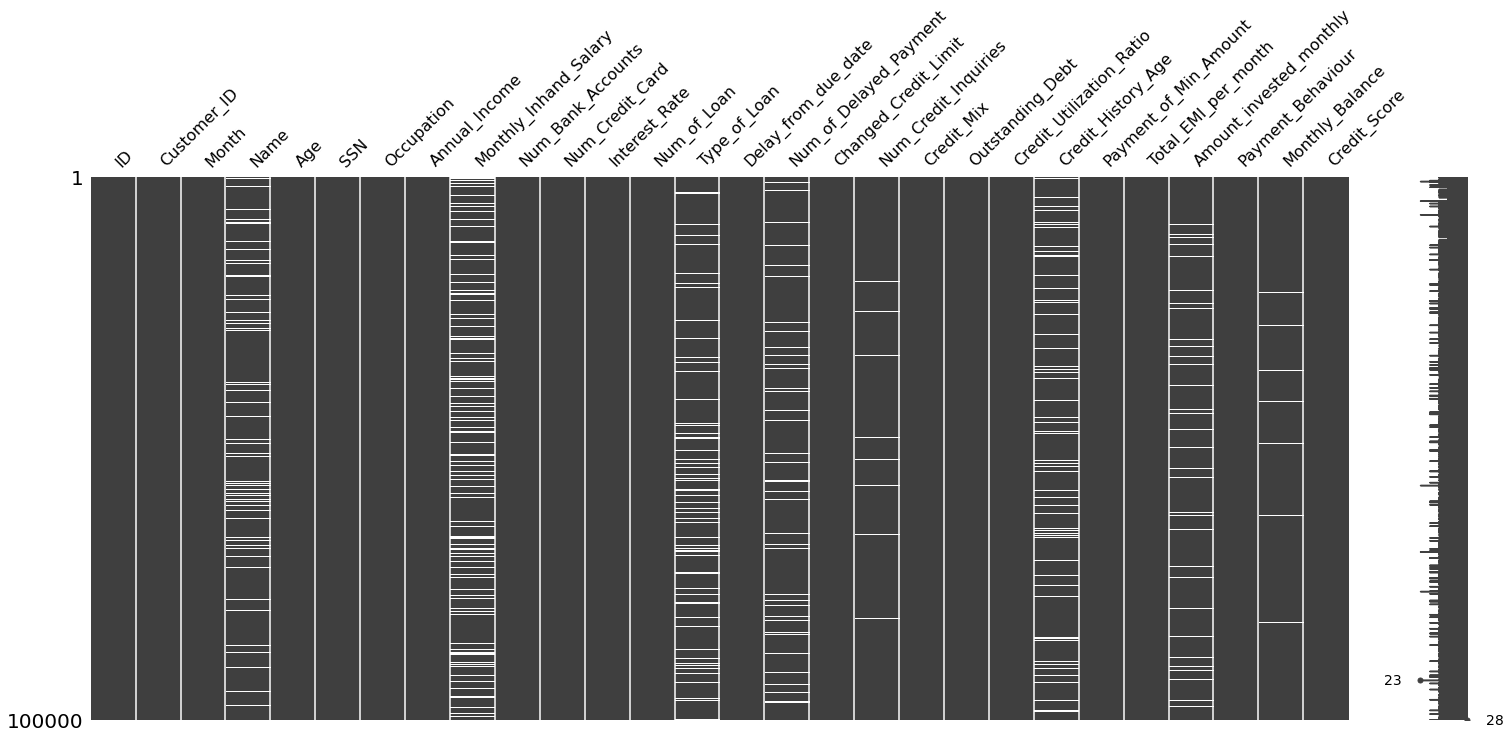

In [163]:
# Visual representation of the missing values in the dataset.
msno.matrix(df_train)

In [164]:
# The percentage of the missing value by column.
(df_train.isnull().mean() * 100).sort_values()

ID                           0.000
Payment_Behaviour            0.000
Total_EMI_per_month          0.000
Payment_of_Min_Amount        0.000
Credit_Utilization_Ratio     0.000
Outstanding_Debt             0.000
Credit_Mix                   0.000
Changed_Credit_Limit         0.000
Delay_from_due_date          0.000
Num_of_Loan                  0.000
Interest_Rate                0.000
Credit_Score                 0.000
Num_Bank_Accounts            0.000
Annual_Income                0.000
Occupation                   0.000
SSN                          0.000
Age                          0.000
Month                        0.000
Customer_ID                  0.000
Num_Credit_Card              0.000
Monthly_Balance              1.200
Num_Credit_Inquiries         1.965
Amount_invested_monthly      4.479
Num_of_Delayed_Payment       7.002
Credit_History_Age           9.030
Name                         9.985
Type_of_Loan                11.408
Monthly_Inhand_Salary       15.002
dtype: float64

In [165]:
df_train.duplicated().sum()

0

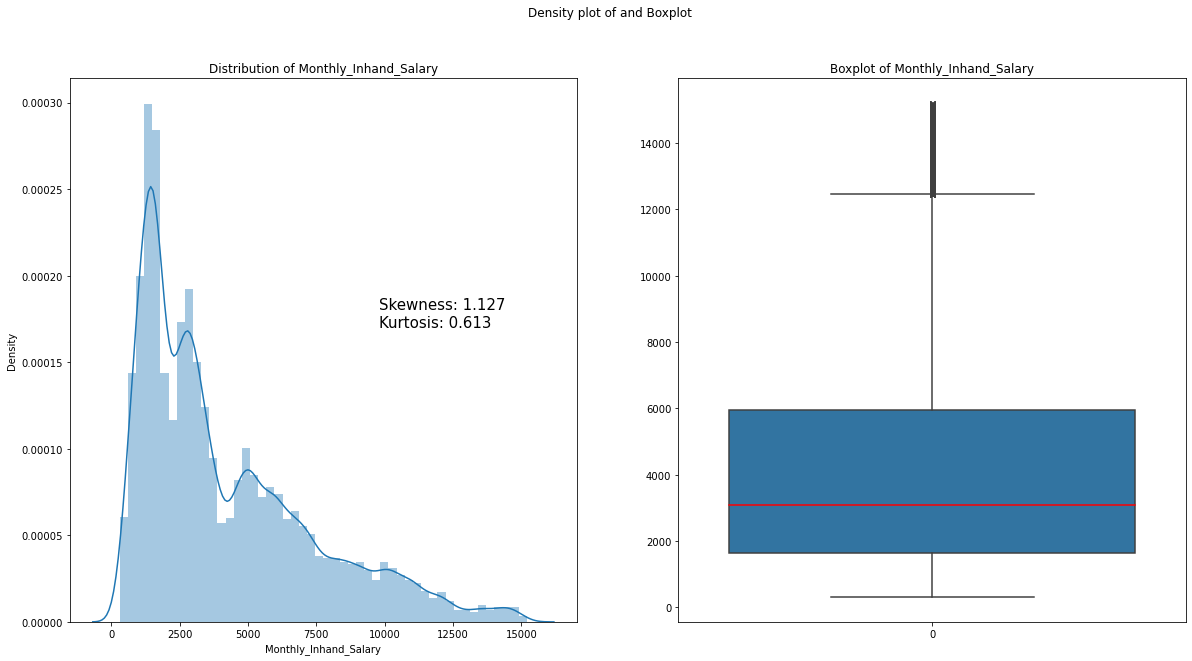

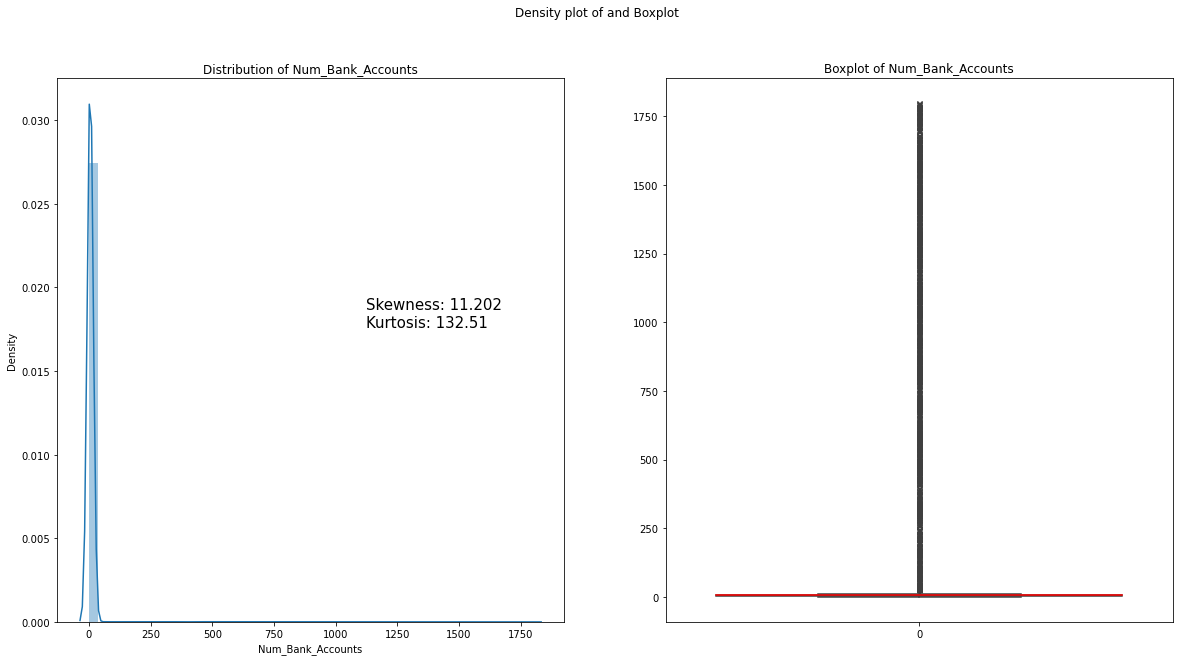

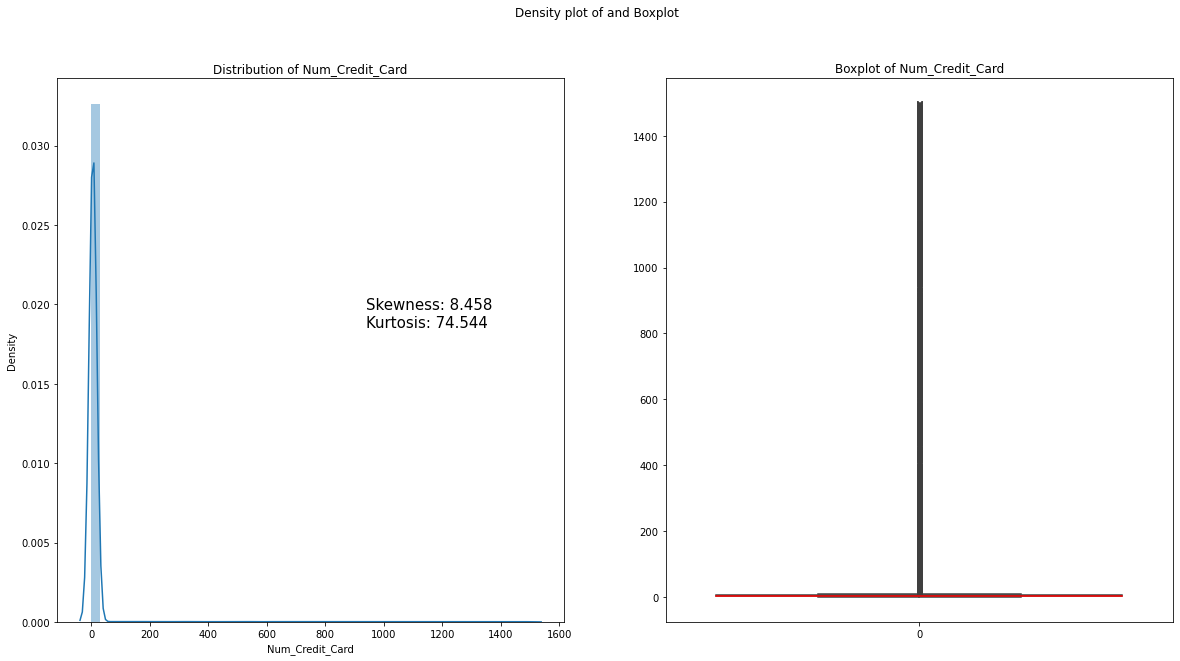

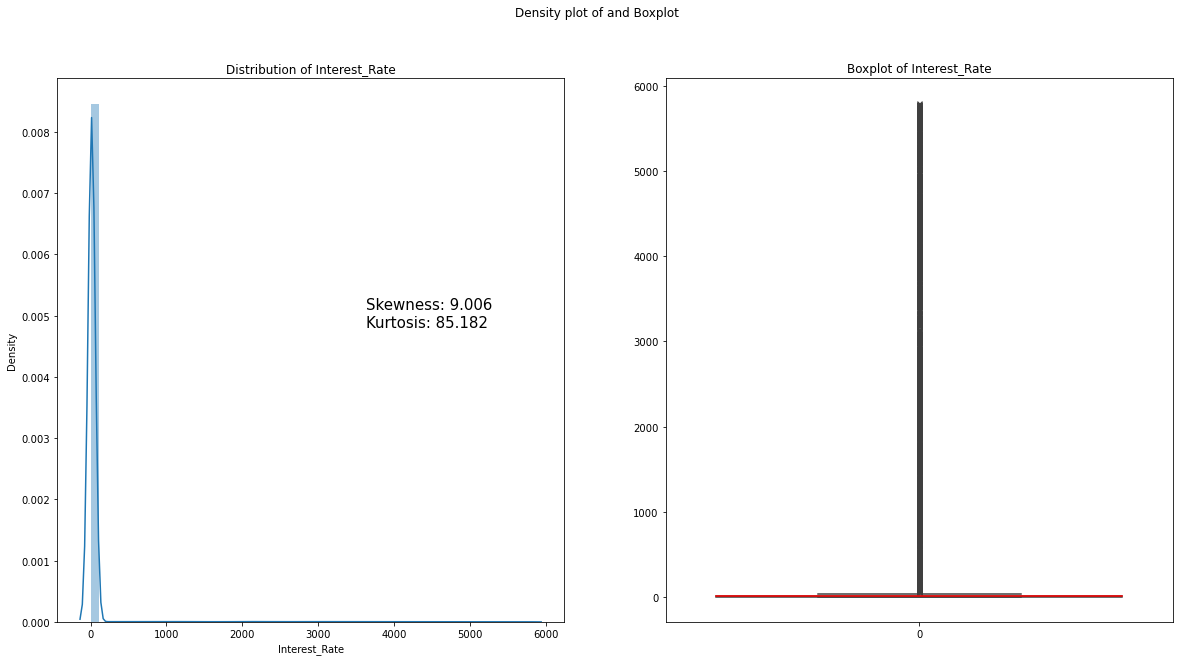

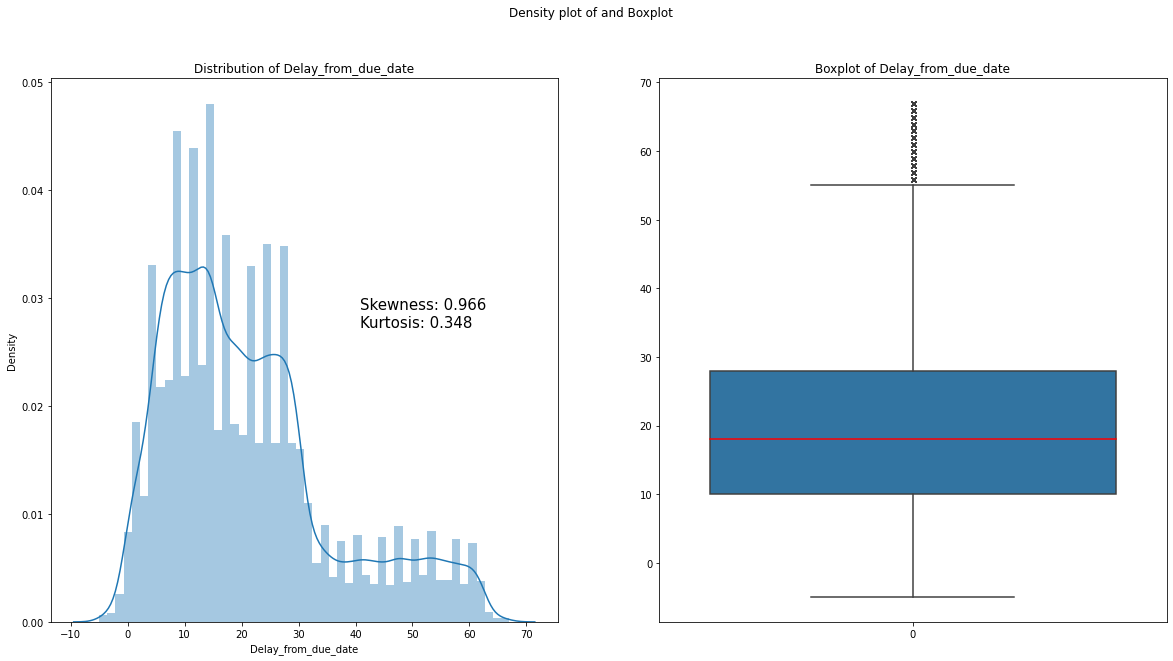

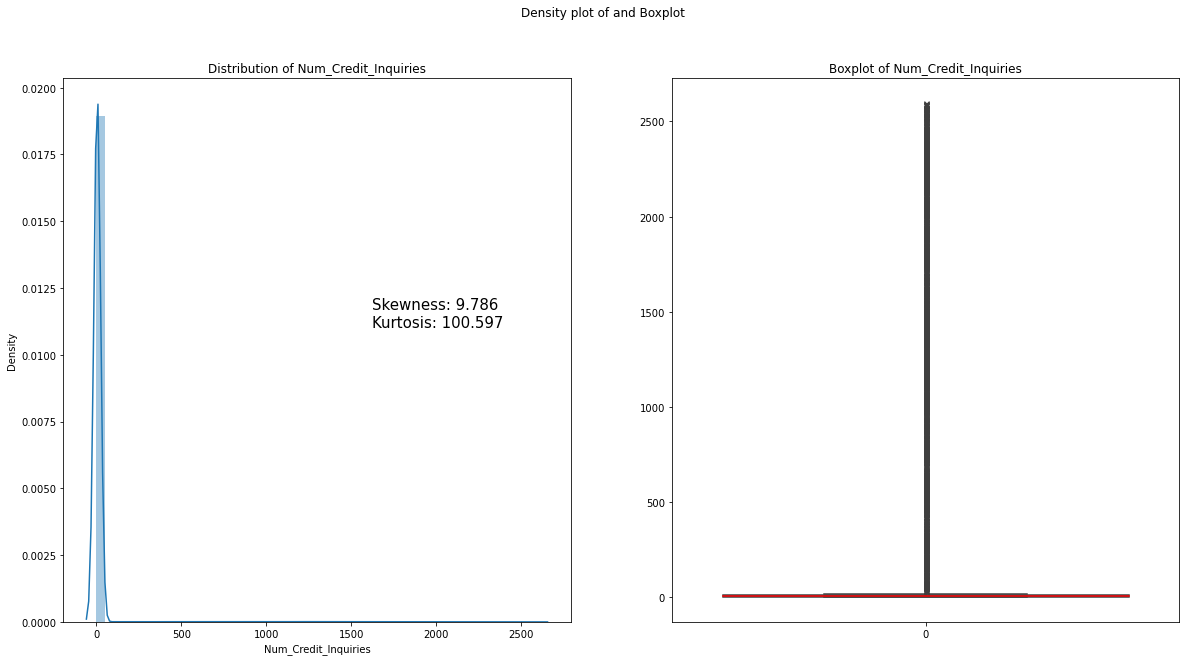

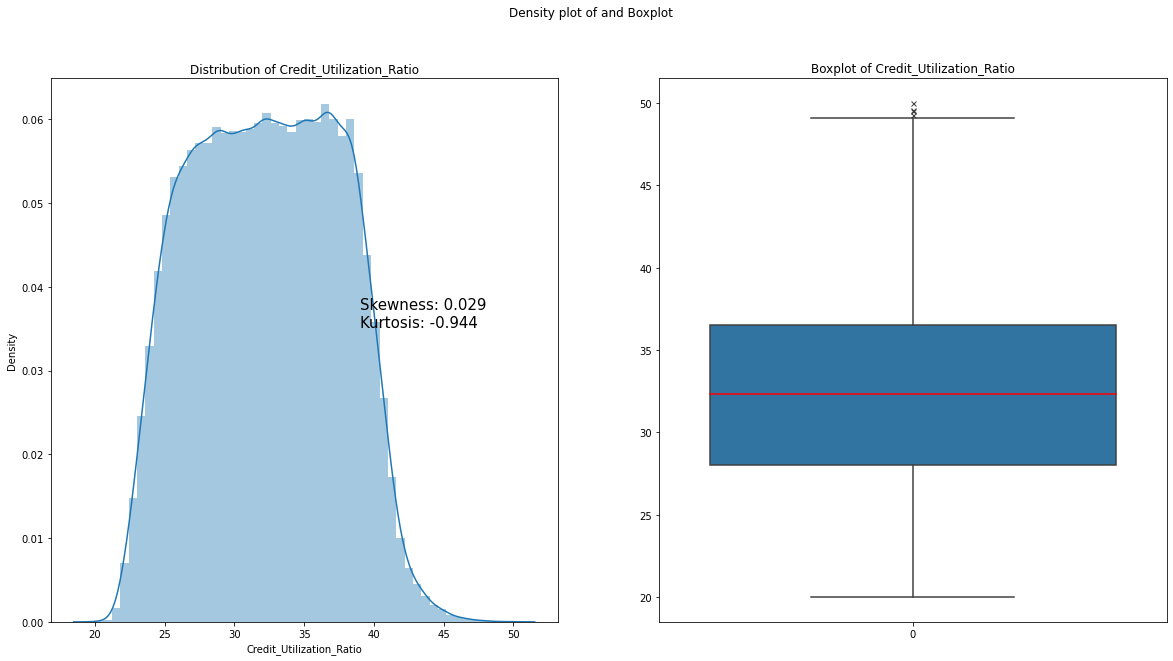

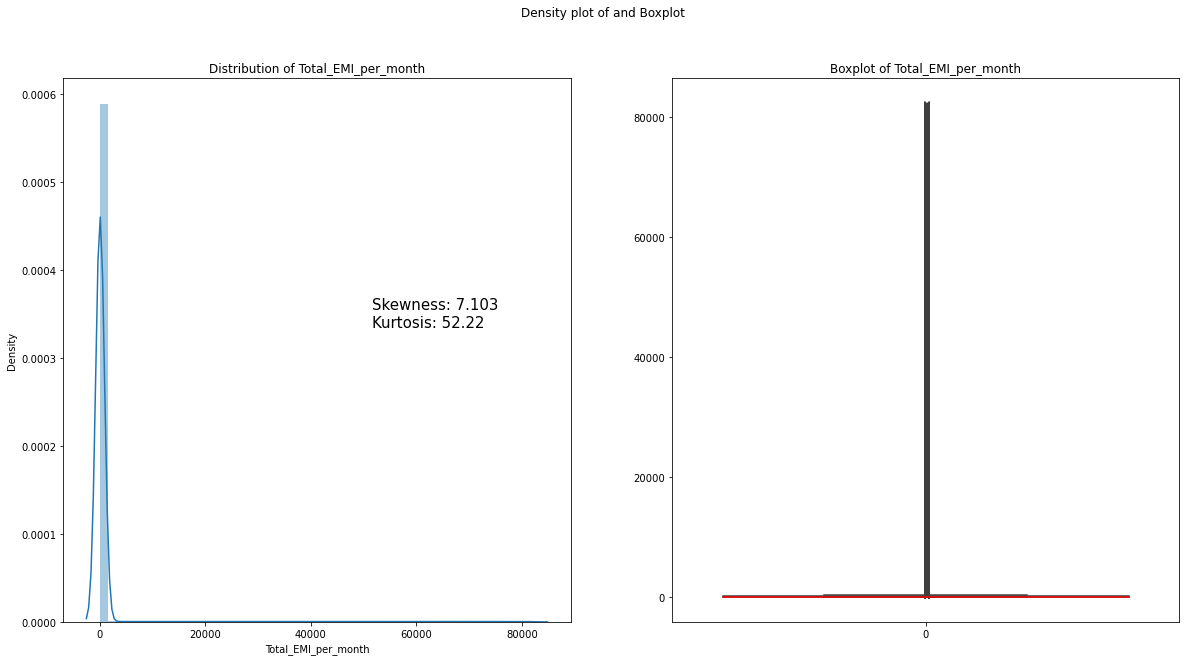

In [166]:
for col in df_train.select_dtypes(include='number').columns:
      plt.figure(figsize=(20,10))
      plt.subplot(121)
      sns.distplot(df_train[col])
      plt.title('Distribution of ' + col)
      plt.subplot(122)
      sns.boxplot(df_train[col],
                  medianprops={"color": "red"},
                  flierprops={"marker": "x"})
      plt.title('Boxplot of ' + col)
      plt.suptitle('Density plot of and Boxplot')
      text = '''
            Skewness: {0}
            Kurtosis: {1}
             '''.format(round(df_train[col].skew(), 3), round(df_train[col].kurtosis(),3))
      plt.figtext(0.3, 0.6, text, horizontalalignment='left', verticalalignment='top', fontsize = 15)
      plt.show()

In [167]:
df_train['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [168]:
df_train['Month'].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

In [169]:
df_train['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [170]:
df_train['Payment_of_Min_Amount'].value_counts()


Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [171]:
df_train['Credit_Mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [172]:
df_train['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [173]:
pd.crosstab(df_train['Credit_Mix'], df_train['Credit_Score'])

Credit_Score,Good,Poor,Standard
Credit_Mix,,,
Bad,288,11409,7292
Good,11875,3861,8601
Standard,2043,7859,26577
_,3622,5869,10704


In [174]:
df_train['Credit_History_Age'].head(n=10)

0    22 Years and 1 Months
1                      NaN
2    22 Years and 3 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
5    22 Years and 6 Months
6    22 Years and 7 Months
7                      NaN
8    26 Years and 7 Months
9    26 Years and 8 Months
Name: Credit_History_Age, dtype: object

There are many issues with the dataset.
- There are columns that not necessary for our analysis hence we remove them.
- Variables are in the wrong type. Many numerical type present as strings. They need to be cleaned as well.
- Missing data.
- Outliers need to be handled. Also the zeros and negative values where necessary needs correction.
- Categorical data need to be Encoded.
- Data cleanning with the removal of unecessary characters.

## Data Cleaning

In [175]:
# Dropping unnecessary columns.
df_train.drop(['ID','Name', 'SSN'], inplace = True, axis = 1)

In [176]:
df_train['Credit_Mix'] = df_train['Credit_Mix'].replace('_', 'Unknown') 

In [177]:
# Replacing in each column the underscores with NaN's.
for col in df_train.columns:
    # Replacing values where there is only underscore or random characters.
    df_train[col] = df_train[col].replace(['_','!@9#%8'],np.nan)
    # Stripping underscores from values if there is any in it.
    if df_train[col].dtypes == object:
        df_train[col] = df_train[col].str.strip('_')
df_train.isna().sum().sort_values()

Customer_ID                     0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Delay_from_due_date             0
Num_of_Loan                     0
Credit_Score                    0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
Age                             0
Month                           0
Interest_Rate                   0
Monthly_Balance              1200
Num_Credit_Inquiries         1965
Changed_Credit_Limit         2091
Amount_invested_monthly      4479
Num_of_Delayed_Payment       7002
Payment_Behaviour            7600
Credit_History_Age           9030
Type_of_Loan                11408
Monthly_Inhand_Salary       15002
dtype: int64

In [178]:
# Defining function that determines the upper and lower limits of a variable for outlier handling
def outlierTreat(col):
    twenty_fifth = df_train[col].quantile(0.25)
    seventy_fifth = df_train[col].quantile(0.75)

    iqr_range = seventy_fifth - twenty_fifth

    upper_limit = round(seventy_fifth + (1.5 * iqr_range))
    lower_limit = twenty_fifth - (1.5 * iqr_range)
    lower_limit = (0 if lower_limit < 0 else lower_limit)

    df_train.loc[df_train[col] > upper_limit, col] = np.NaN
    df_train.loc[df_train[col] < lower_limit, col] = np.NaN

# Function that imputes data for a customer where inconsistent data is present
def groupImputer(col):
    grped_df = df_train.groupby('Customer_ID')[col]
    df_dict = {}
    for id, group in grped_df:
        new_grp = group.fillna(method = 'ffill').fillna(method = 'bfill')
        kv = {id : new_grp}
        df_dict.update(kv)

    for key, value in df_dict.items():
        val = pd.DataFrame(value)
        for i in val.iterrows():
            id = i[0]
            value = i[1][0]
            df_train.loc[df_train.index == id, col] = value


### Credit Mix cleaning

After the underscores have been removed, we introduced some missing values in the Credit_Mix variable. Using a simple imputation technique will help to keep the distribution of the values.

In [179]:
#df_train['Credit_Mix'] = df_train['Credit_Mix'].fillna(method = 'ffill').fillna(method = 'bfill')
df_train['Credit_Mix'].value_counts()

Standard    36479
Good        24337
Unknown     20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [180]:
pd.crosstab(df_train['Credit_Mix'], df_train['Credit_Score'])

Credit_Score,Good,Poor,Standard
Credit_Mix,,,
Bad,288,11409,7292
Good,11875,3861,8601
Standard,2043,7859,26577
Unknown,3622,5869,10704


### Age cleaning

We can assume that age values above 100 are outliers and false data.

In [181]:
# Remove anything that is not a digit from the Age column.
df_train['Age'] = df_train['Age'].str.replace(r'\D+','')

# Convert the variable to int
df_train['Age'] = df_train['Age'].astype('int')

# Subset those rows where we have age more then 80 years.
df_train.loc[df_train['Age'] >=80, 'Age'] = np.NaN

In [182]:
# Calling the predefined imputer function
groupImputer('Age')

### Occupation cleaning

Replacing the underscores from the Occupation column and than cheking the number of recods for each customer.

In [183]:
df_train['Occupation'] = df_train['Occupation'].replace('', np.nan)
grpd_month = df_train.groupby('Customer_ID')['Month'].count()
grpd_month.value_counts()

8    12500
Name: Month, dtype: int64

All of the customers have 8 months of records from January to August. Now subset this for only the missing values and group them again. If there is a customer with 8 month of missing values from the Occupation then we can be sure that it has never given any details before, otherwise we can use the Occupation that has been assigned to that customer once and we don't need to guess. We make the assumption that during that 8 months the occupation of the customer hasn't changed.

In [184]:
missing_occupation = df_train[df_train['Occupation'].isna()]
missing_occupation = missing_occupation.groupby('Customer_ID')['Month'].count()
missing_occupation.value_counts()

1    4248
2    1113
3     169
4      19
5       1
Name: Month, dtype: int64

It seems that there is no customer with 8 months of missing records hence all the customers have previous data for their Occupation and we don't have to guess.

In [185]:
# Get all the customer IDs from the dataset
cust_id = df_train['Customer_ID'].unique()
cust_occupation = {}

# Creating a dictionary for each customer id with their occupation.
for id in cust_id:
    cust = df_train.query(f'Customer_ID == "{id}"')['Occupation'].reset_index()
    cust = cust.dropna()
    occupation = cust['Occupation'].unique().item()
    key_value = {id : occupation}
    cust_occupation.update(key_value)


In [186]:
# Imputing the missing values based on the Customer ID
for key, value in cust_occupation.items():
    df_train.loc[df_train['Customer_ID'] == key, 'Occupation'] = value

### Annual Income cleaning

<AxesSubplot:>

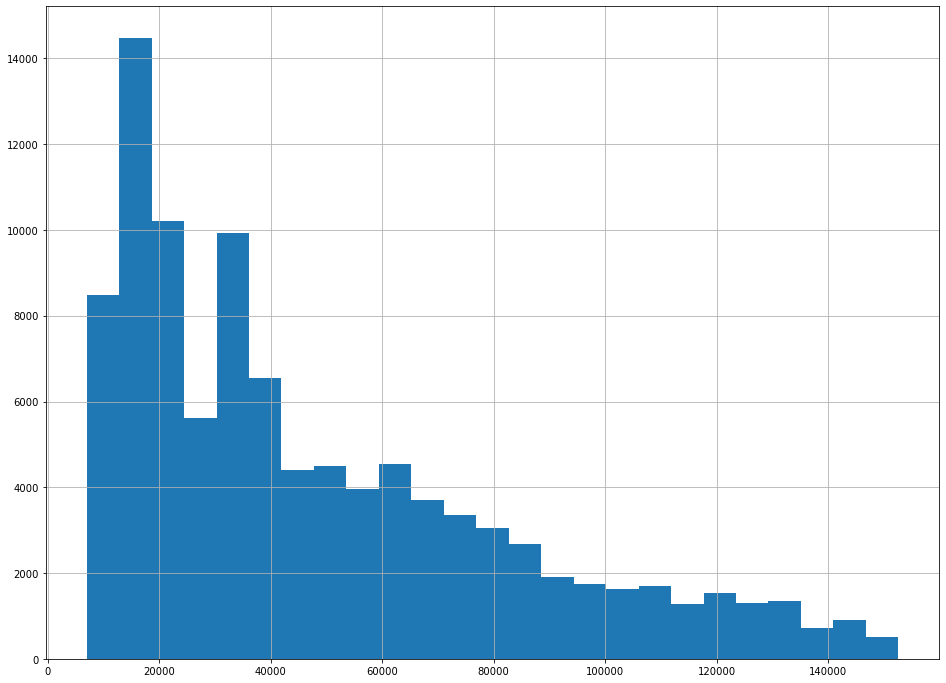

In [187]:
# Convert to float
df_train['Annual_Income'] = df_train['Annual_Income'].astype('float64')

# Remove outliers and impute by customer
outlierTreat('Annual_Income')
groupImputer('Annual_Income')

# Impute the mean for customers where data has been removed and couldn't impute anything at the first time
df_train_AnnInc = pd.DataFrame(df_train['Annual_Income'])
simple_imputer = SimpleImputer(strategy = 'mean')
df_train_AnnInc = pd.DataFrame(simple_imputer.fit_transform(df_train_AnnInc))
df_train['Annual_Income'] = df_train_AnnInc


df_train['Annual_Income'].hist(bins = 25)


### Monthly Inhand Salary cleaning

Customers Monthly Inhand Salary salary is consistent and we assume that it hasn't changed during that 8 months period. We simply impute the monthly salary by customer based on their existing one hence avoiding any inconsistency.

In [188]:
groupImputer('Monthly_Inhand_Salary')

### Number of Bank Accounts cleaning

In [189]:
# Removing the outliers and replacing them with NaNs
outlierTreat('Num_Bank_Accounts')

# Imputing the most frequent number of accounts
groupImputer('Num_Bank_Accounts')


### Number of Credit Card

In [190]:
# Removing the outliers and replacing them with NaNs
outlierTreat('Num_Credit_Card')

# Imputing the most frequent number of accounts
groupImputer('Num_Credit_Card')

### Interest Rate cleaning

In [191]:
# Removing any outliers
outlierTreat('Interest_Rate')

# Imputing the interest rate for each customer based on their existing rate.
groupImputer('Interest_Rate')

### Number of Loan cleaning

In [192]:
# Convert to float
df_train['Num_of_Loan'] = df_train['Num_of_Loan'].astype('float64')

# Removing outliers
outlierTreat('Num_of_Loan')

# Imputing the inumber of loan for each customer based on their existing ones.
groupImputer('Num_of_Loan')

### Type of Loan cleaning

In [193]:
df_train['Type_of_Loan'] = df_train['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)
df_train['Type_of_Loan'].unique()

array(['auto loan,credit-builder loan,personal loan,home equity loan',
       'credit-builder loan', 'auto loan,auto loan,not specified', ...,
       'home equity loan,auto loan,auto loan,auto loan',
       'payday loan,student loan,mortgage loan,not specified',
       'personal loan,auto loan,mortgage loan,student loan,student loan'],
      dtype=object)

In [194]:
df_train_type_loan = pd.DataFrame(df_train['Type_of_Loan'])
simple_imputer = SimpleImputer(strategy = 'most_frequent')
df_train_type_loan = pd.DataFrame(simple_imputer.fit_transform(df_train_type_loan))
df_train['Type_of_Loan'] = df_train_type_loan

### Delay from due date cleaning

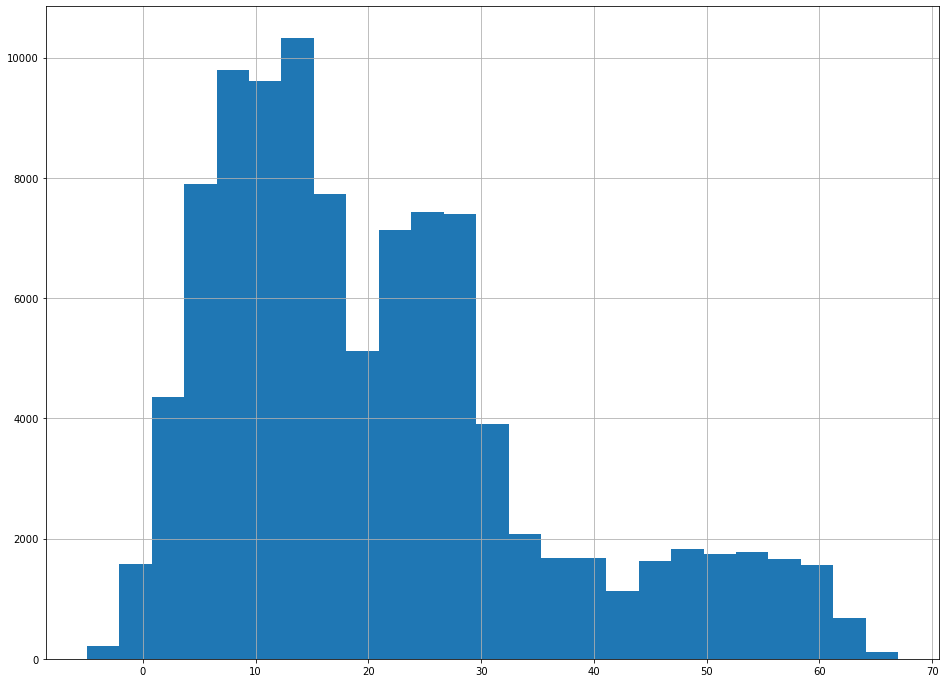

In [195]:
df_train['Delay_from_due_date'].hist(bins = 25)
plt.show()

In [196]:
# Remove outliers
outlierTreat('Delay_from_due_date')

df_train_delay = pd.DataFrame(df_train['Delay_from_due_date'])
simple_imputer = SimpleImputer(strategy = 'mean')
df_train_delay = pd.DataFrame(simple_imputer.fit_transform(df_train_delay))
df_train['Delay_from_due_date'] = df_train_delay

### Number of delayed payment

In [197]:
df_train.loc[df_train['Num_of_Delayed_Payment'] == 'NaN', 'Num_of_Delayed_Payment'] = np.NaN
df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].astype('float64')

outlierTreat('Num_of_Delayed_Payment')

df_train_num_delay = pd.DataFrame(df_train['Num_of_Delayed_Payment'])
simple_imputer = SimpleImputer(strategy = 'mean')
df_train_num_delay = pd.DataFrame(simple_imputer.fit_transform(df_train_num_delay))
df_train['Num_of_Delayed_Payment'] = round(df_train_num_delay)

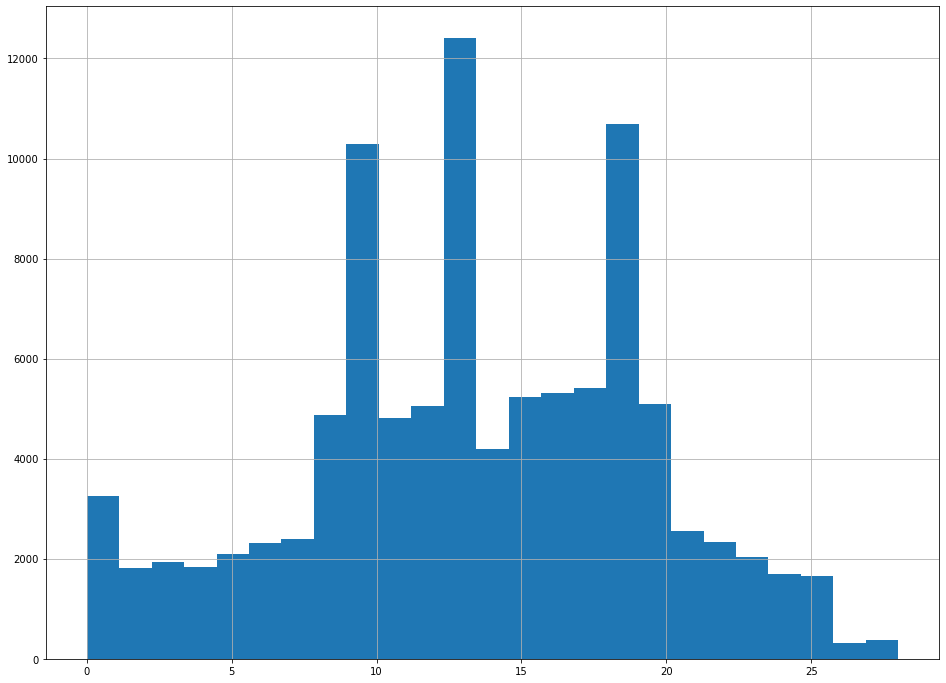

In [198]:
df_train['Num_of_Delayed_Payment'].hist(bins = 25)
plt.show()

### Changed Credit Limit cleaning

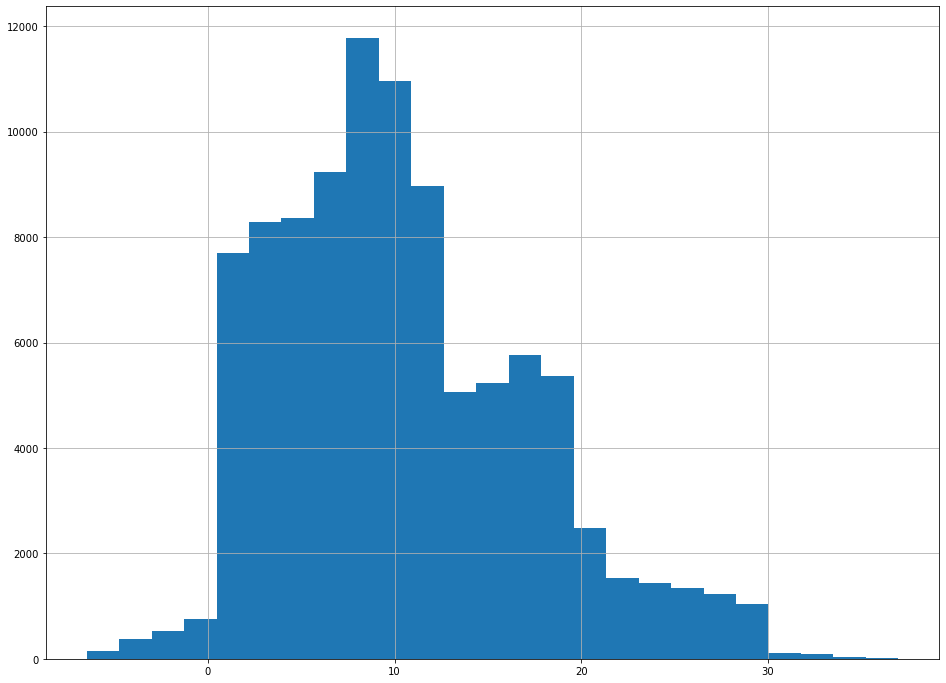

In [199]:
df_train.loc[df_train['Changed_Credit_Limit'] == 'NaN', 'Changed_Credit_Limit'] = np.NaN
df_train['Changed_Credit_Limit'] = df_train['Changed_Credit_Limit'].astype('float64')
df_train['Changed_Credit_Limit'].hist(bins = 25)
plt.show()

In [200]:
outlierTreat('Changed_Credit_Limit')

df_train_credit_change = pd.DataFrame(df_train['Changed_Credit_Limit'])
simple_imputer = SimpleImputer(strategy = 'mean')
df_train_credit_change = pd.DataFrame(simple_imputer.fit_transform(df_train_credit_change))
df_train['Changed_Credit_Limit'] = df_train_credit_change


### Number of Credit Inquiries cleaning

In [201]:
outlierTreat('Num_Credit_Inquiries')

df_train_credit_inq = pd.DataFrame(df_train['Num_Credit_Inquiries'])
simple_imputer = SimpleImputer(strategy = 'most_frequent')
df_train_credit_inq = pd.DataFrame(simple_imputer.fit_transform(df_train_credit_inq))
df_train['Num_Credit_Inquiries'] = df_train_credit_inq

### Outstanding Debt cleaning

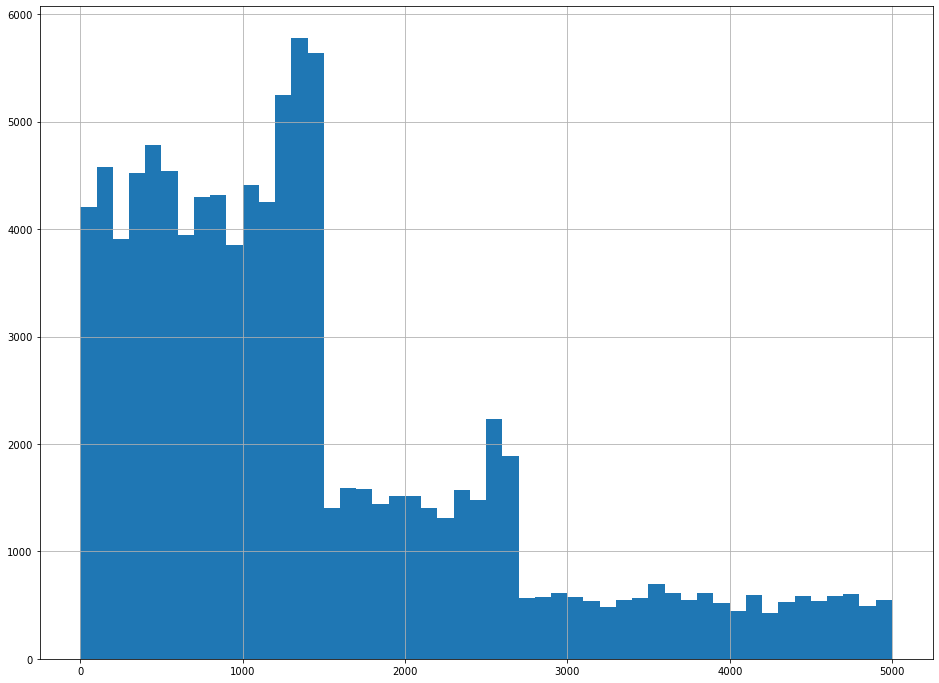

In [202]:
df_train['Outstanding_Debt'] = df_train['Outstanding_Debt'].astype('float64')
df_train['Outstanding_Debt'].hist(bins = 50)
plt.show()

### Total EMI per month - equated monthly installment

<function matplotlib.pyplot.show(close=None, block=None)>

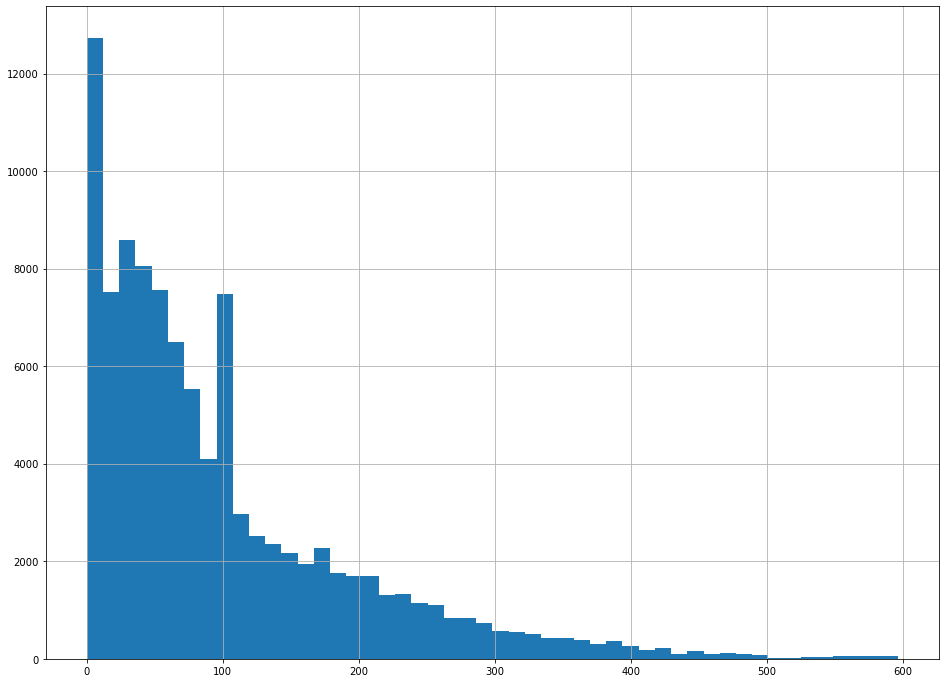

In [203]:
# Removing outliers but this time with a higher upper limit.
df_train.loc[df_train['Total_EMI_per_month'] > 600, 'Total_EMI_per_month'] = np.NaN

#Imputung the mean of the monthly installments
df_train_EMI = pd.DataFrame(df_train['Total_EMI_per_month'])
simple_imputer = SimpleImputer(strategy = 'mean')
df_train_EMI = pd.DataFrame(simple_imputer.fit_transform(df_train_EMI))
df_train['Total_EMI_per_month'] = df_train_EMI
df_train['Total_EMI_per_month'].hist(bins = 50)
plt.show

### Credit History Age cleaning

In [204]:
def CreditHistoryConverter(value):
    if value is not np.NaN:
        year = int(value.split(' ')[0])
        month = int(value.split(' ')[3])

        return ((year*12) + month)
    else:
        return value
    
df_train['Credit_History_Age'] = (df_train['Credit_History_Age'].apply(lambda value: CreditHistoryConverter(value)))

def CHAConverter(value):
    for i in value:
        val = pd.DataFrame(value).interpolate(method = 'linear').interpolate(method = 'linear', limit_direction = 'backward')
        return val

grped_df = df_train.groupby('Customer_ID')['Credit_History_Age']
df_dict = {}
for id, group in grped_df:
    new_grp = (CHAConverter(group))
    kv = {id : new_grp}
    df_dict.update(kv)

for key, value in df_dict.items():
    for i in value.iterrows():
        id = i[0]
        val = i[1][0]
        df_train.loc[df_train.index == id, 'Credit_History_Age'] = val


### Amount Invested Monthly cleaning

<AxesSubplot:>

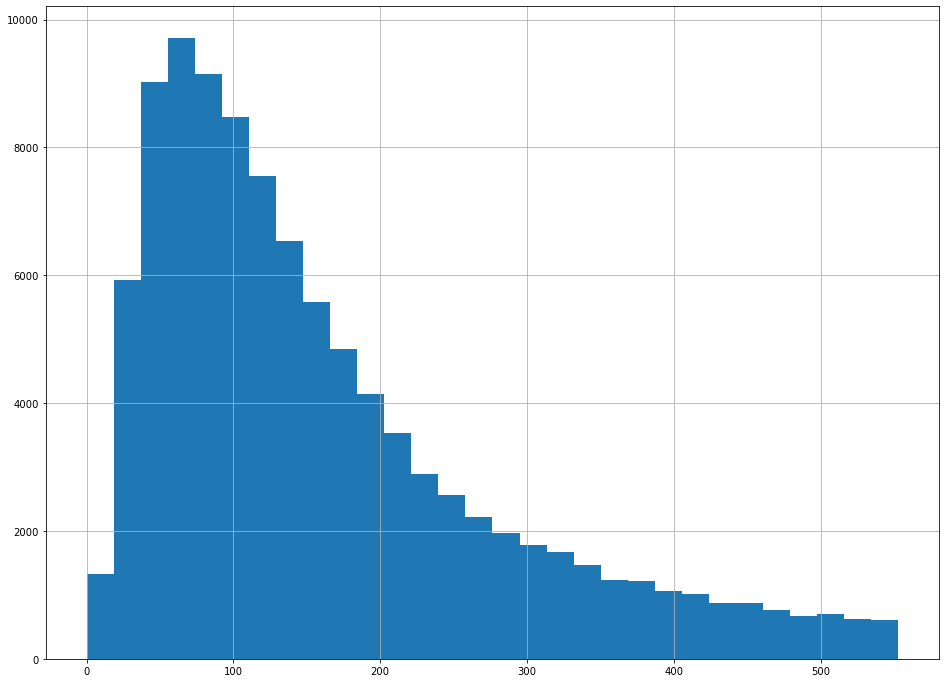

In [205]:
df_train['Amount_invested_monthly'] = df_train['Amount_invested_monthly'].astype('float64')
outlierTreat('Amount_invested_monthly')
groupImputer('Amount_invested_monthly')
df_train['Amount_invested_monthly'].hist(bins = 30)

### Payment Behaviour cleaning

In [206]:
df_train['Payment_Behaviour'].fillna(method = 'ffill', inplace = True)
df_train['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      27593
High_spent_Medium_value_payments    19010
Low_spent_Medium_value_payments     14987
High_spent_Large_value_payments     14863
High_spent_Small_value_payments     12250
Low_spent_Large_value_payments      11297
Name: Payment_Behaviour, dtype: int64

### Monthly Balance cleaning

<AxesSubplot:>

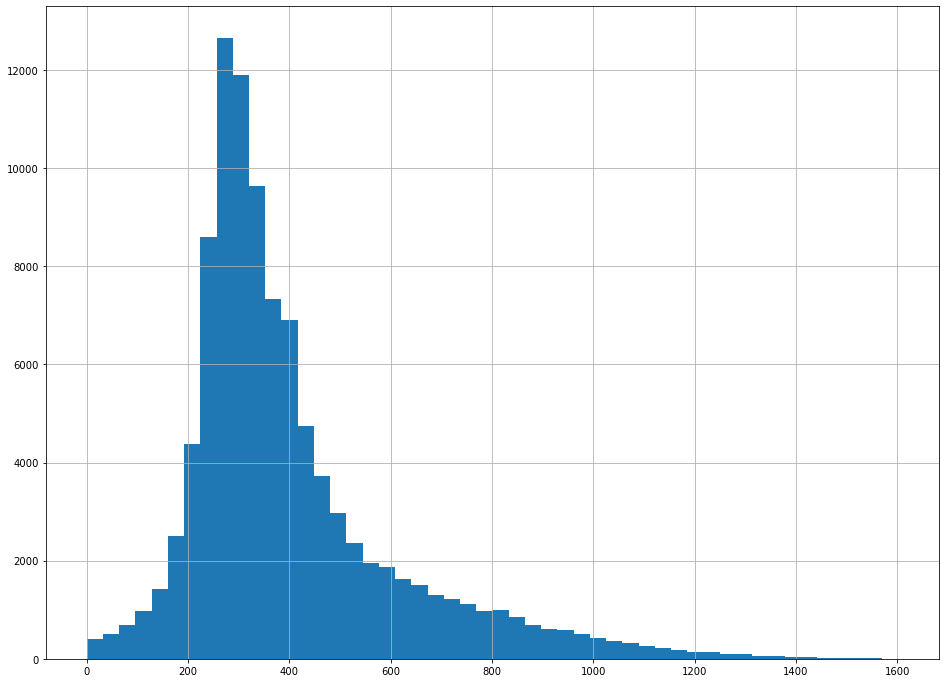

In [207]:
df_train['Monthly_Balance'] = df_train['Monthly_Balance'].astype('float64')
df_train.loc[df_train['Monthly_Balance'] < 0, 'Monthly_Balance'] = np.NaN

df_train_monthly_bal = pd.DataFrame(df_train['Monthly_Balance'])
knn_imputer = KNNImputer(n_neighbors = 2)
df_train_monthly_bal = pd.DataFrame(knn_imputer.fit_transform(df_train_monthly_bal))
df_train['Monthly_Balance'] = df_train_monthly_bal

df_train['Monthly_Balance'].hist(bins = 50)

<AxesSubplot:>

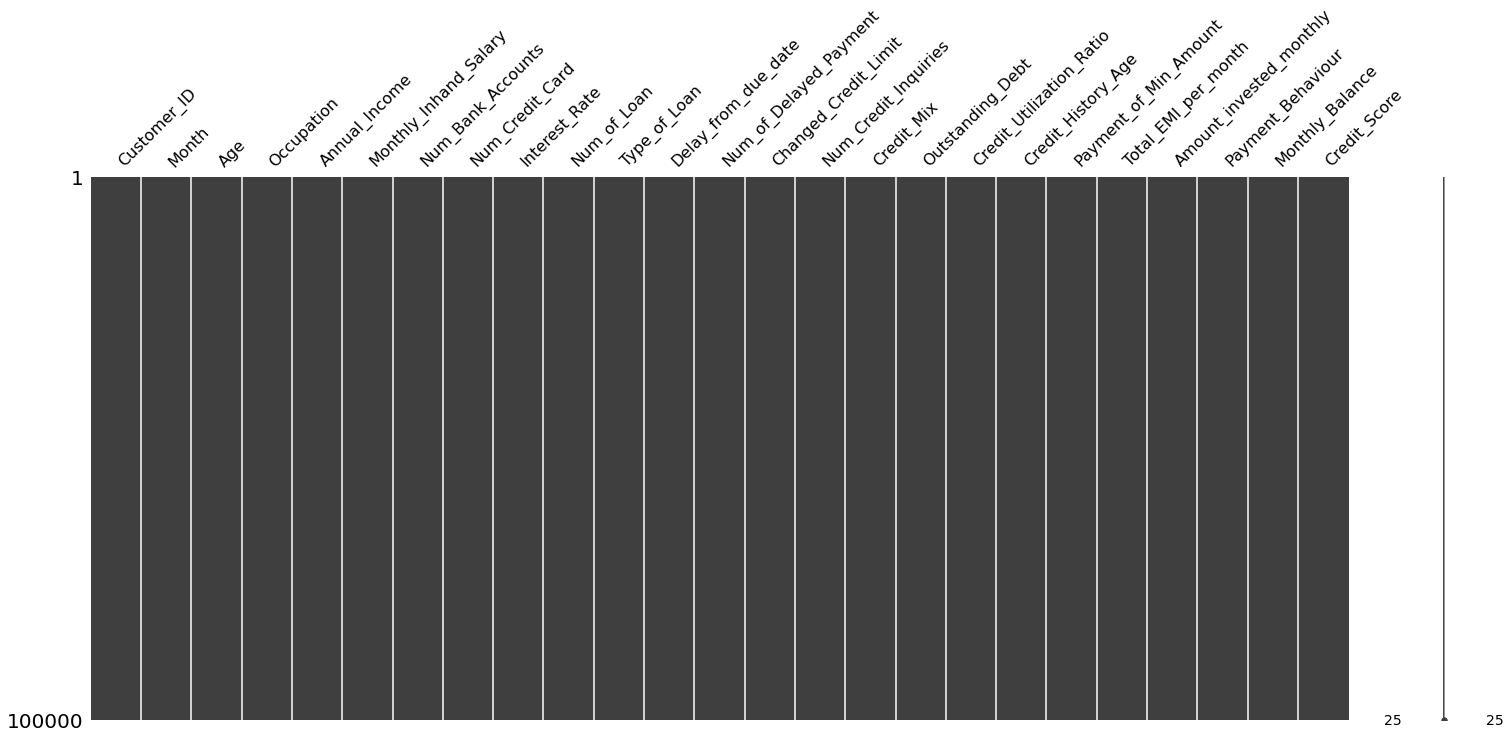

In [208]:
msno.matrix(df_train)

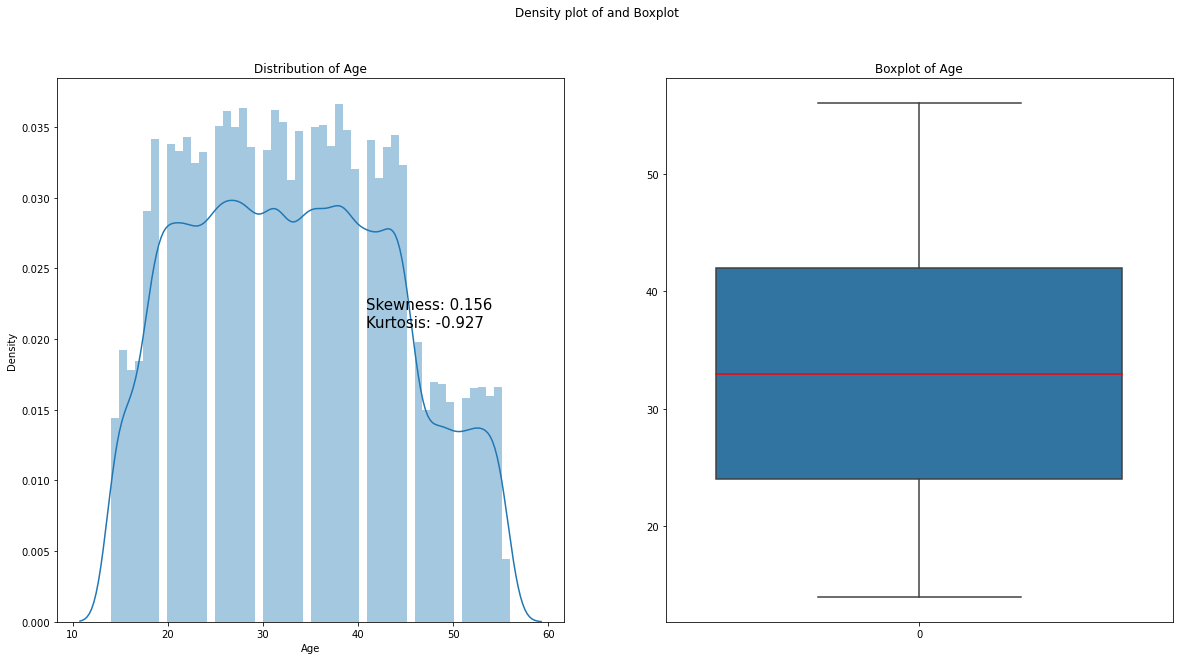

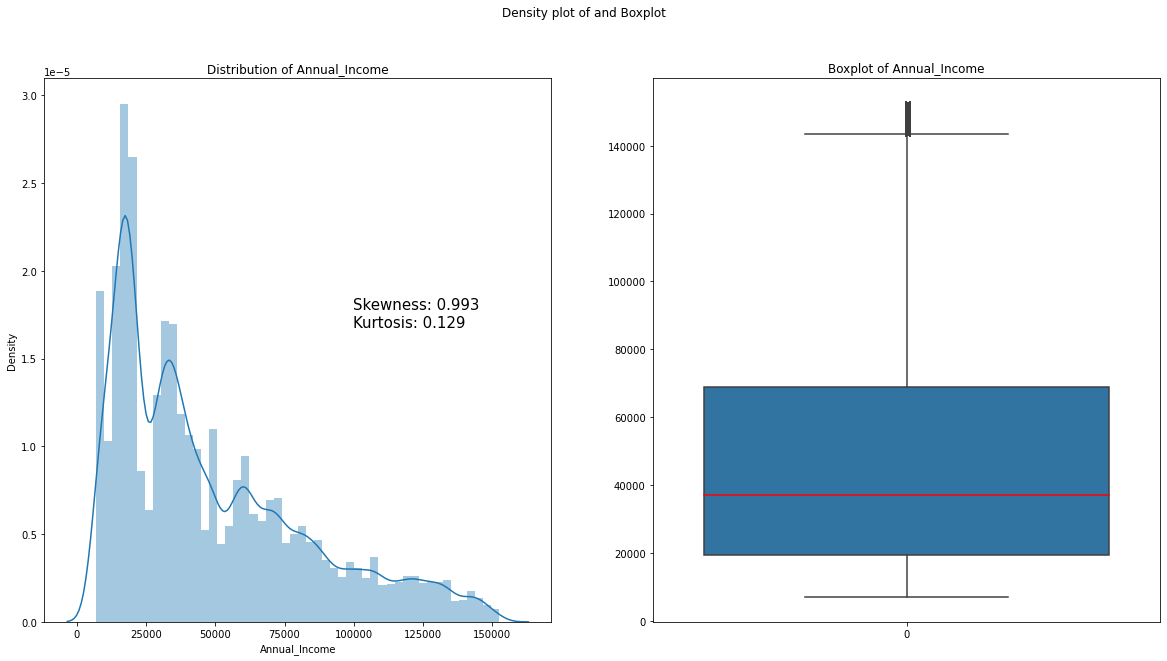

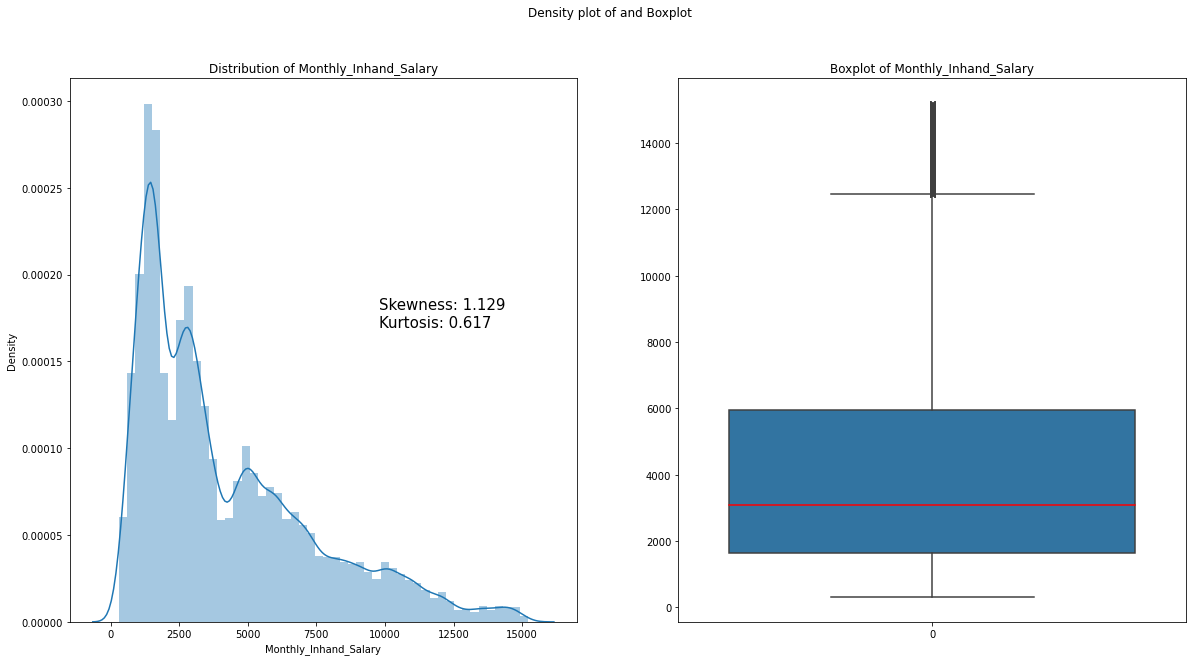

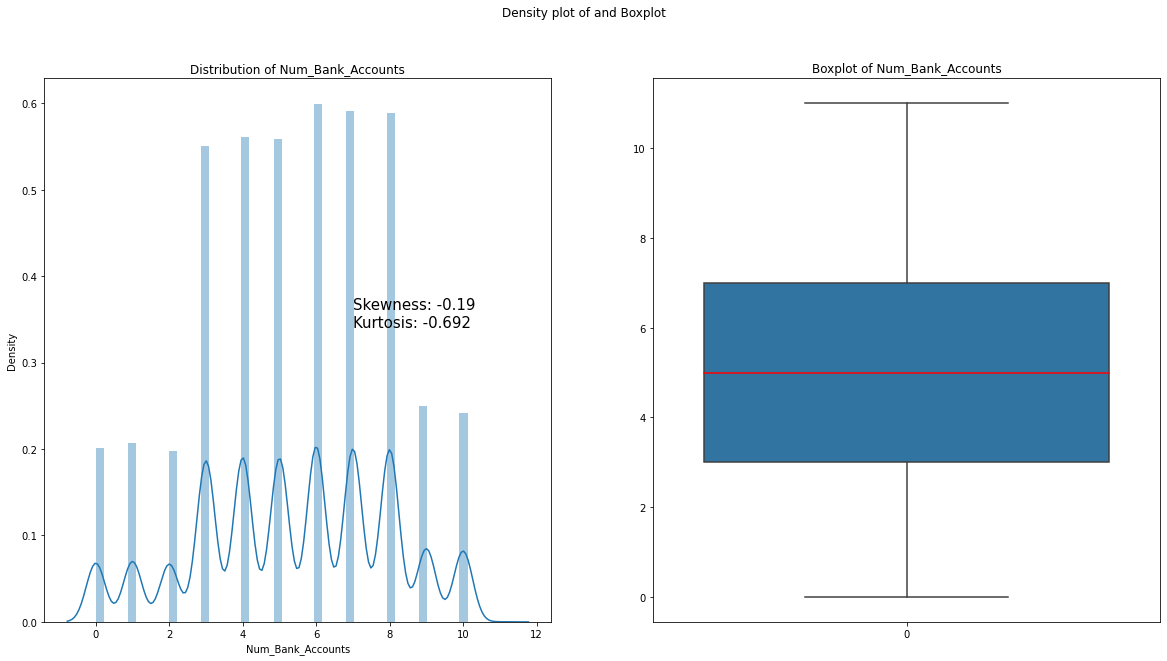

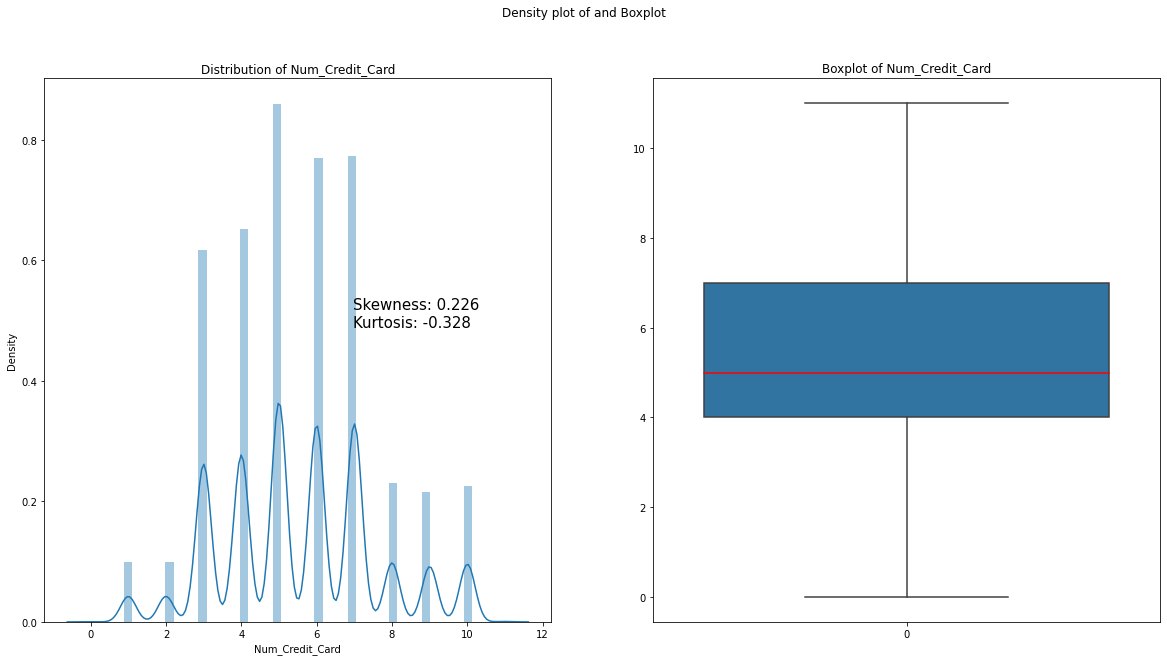

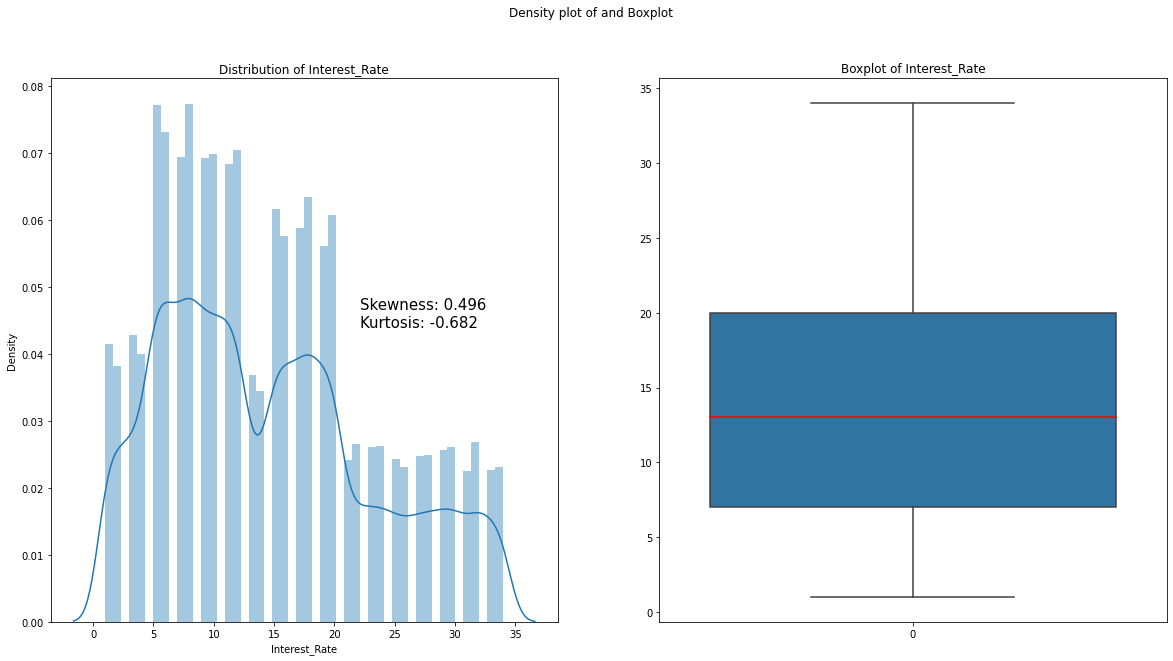

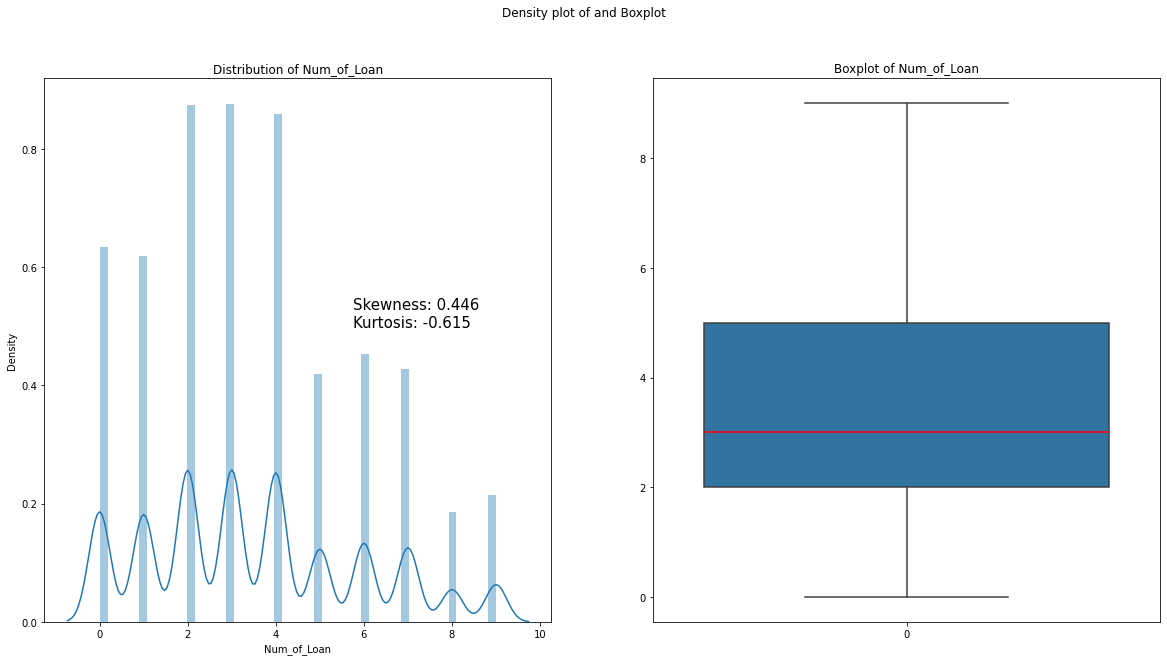

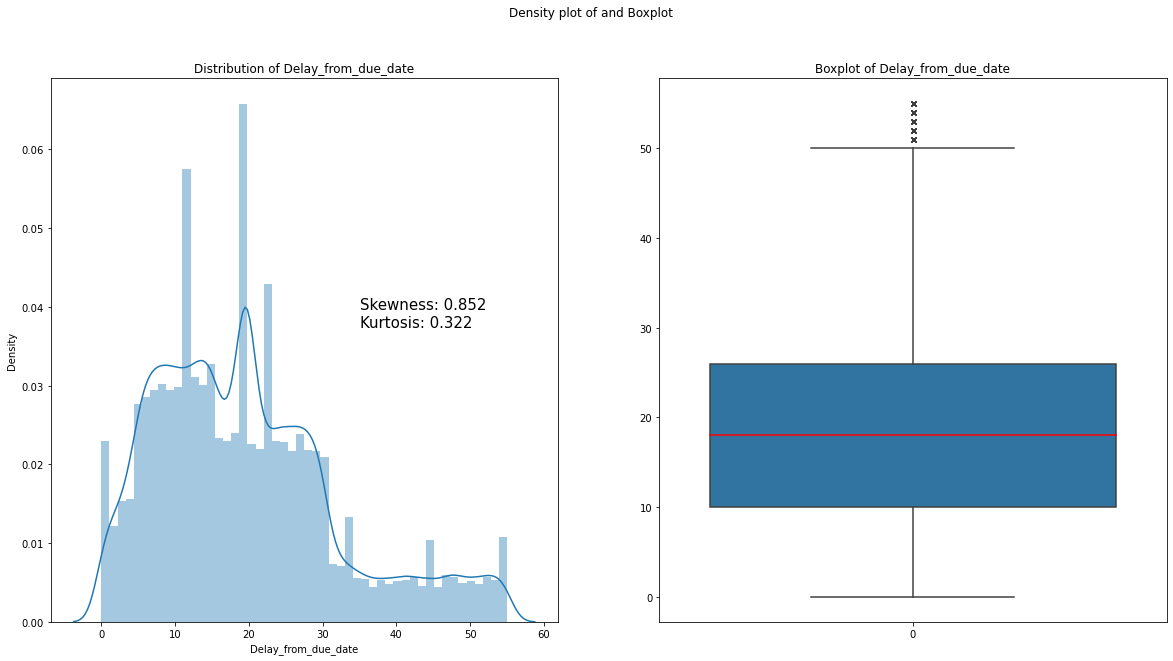

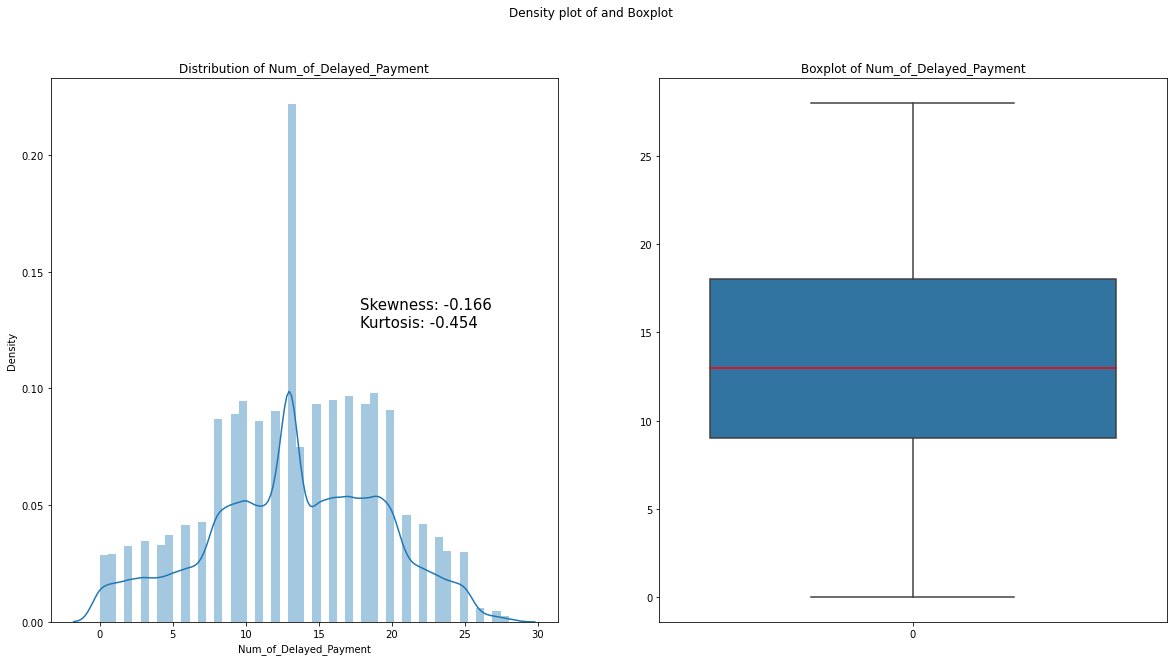

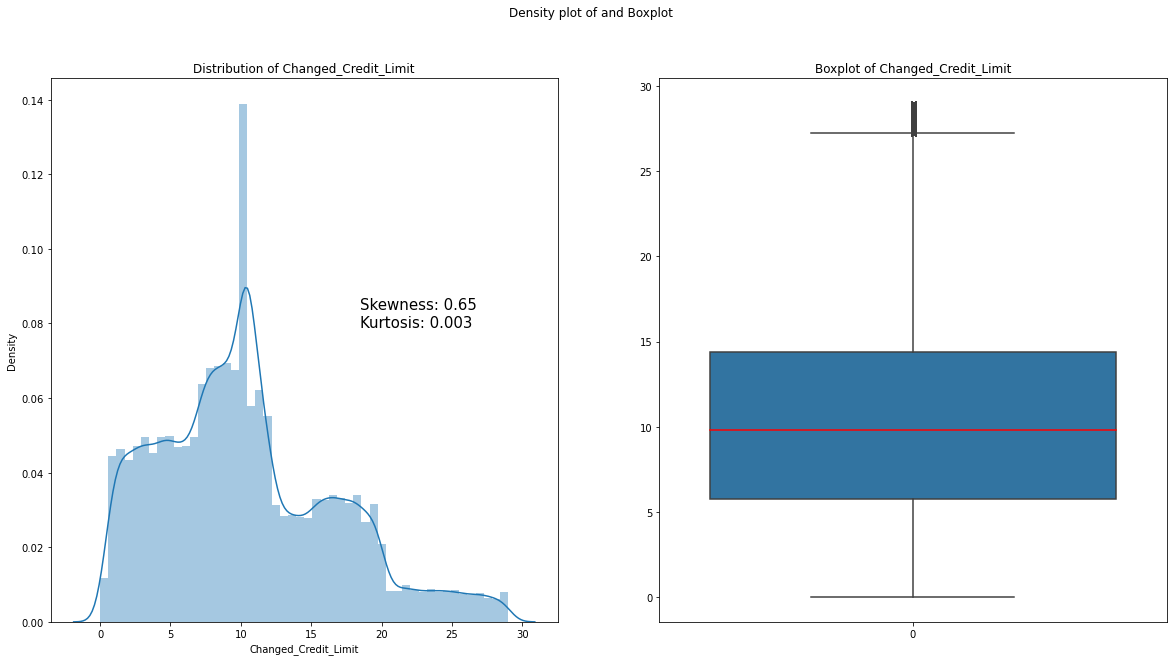

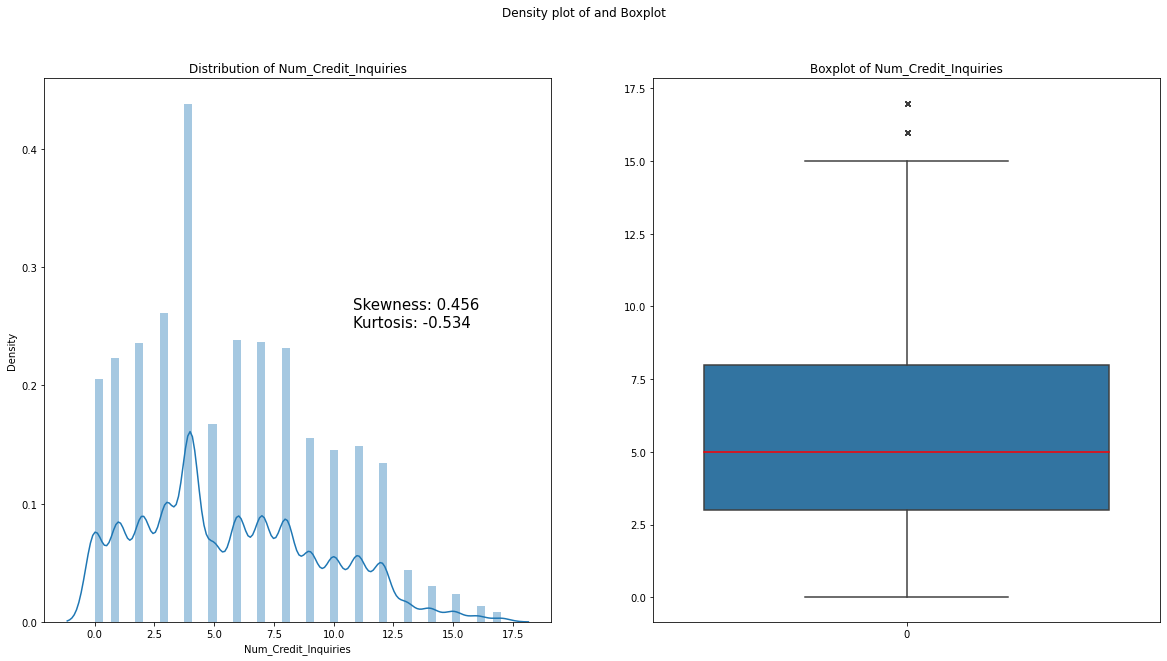

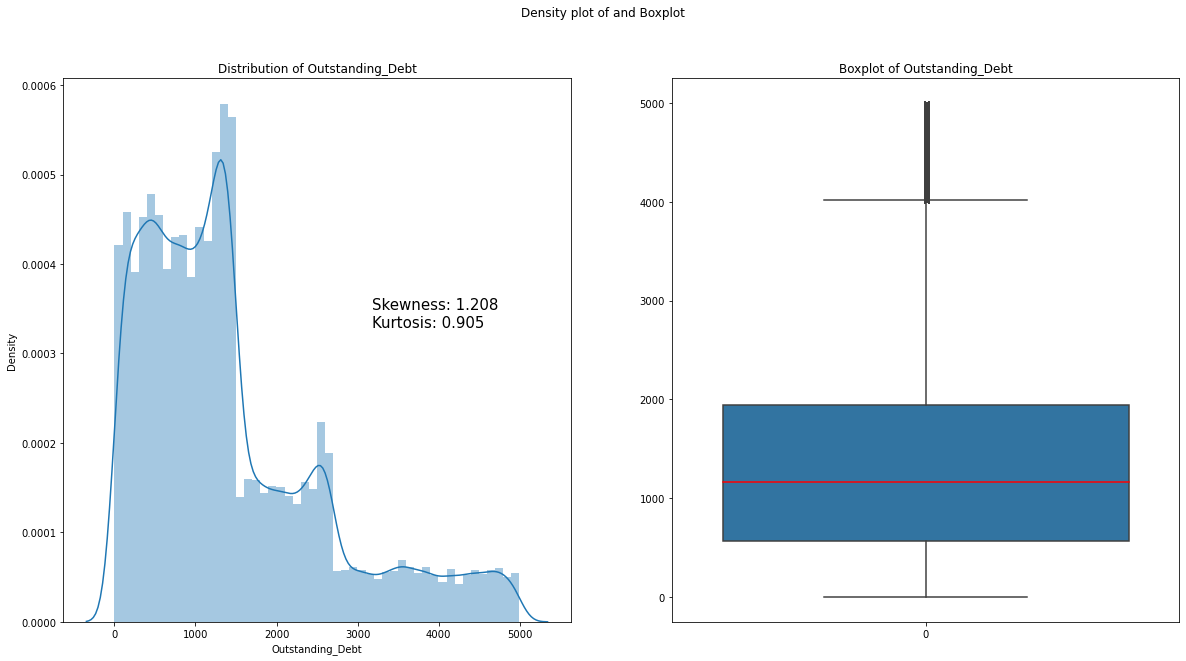

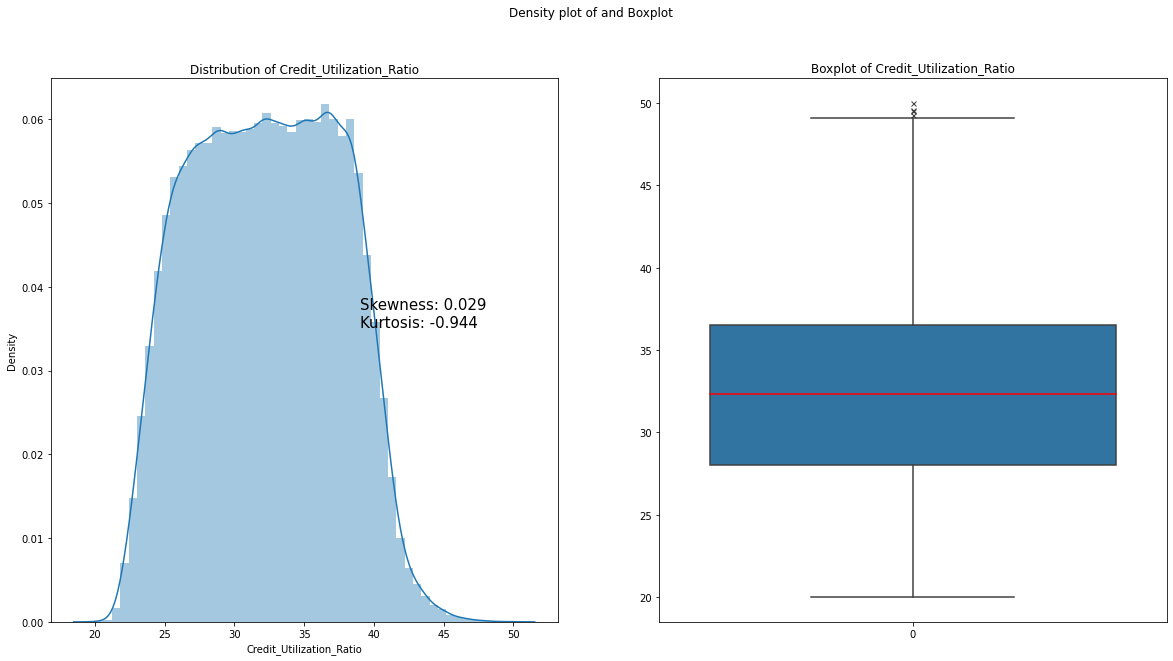

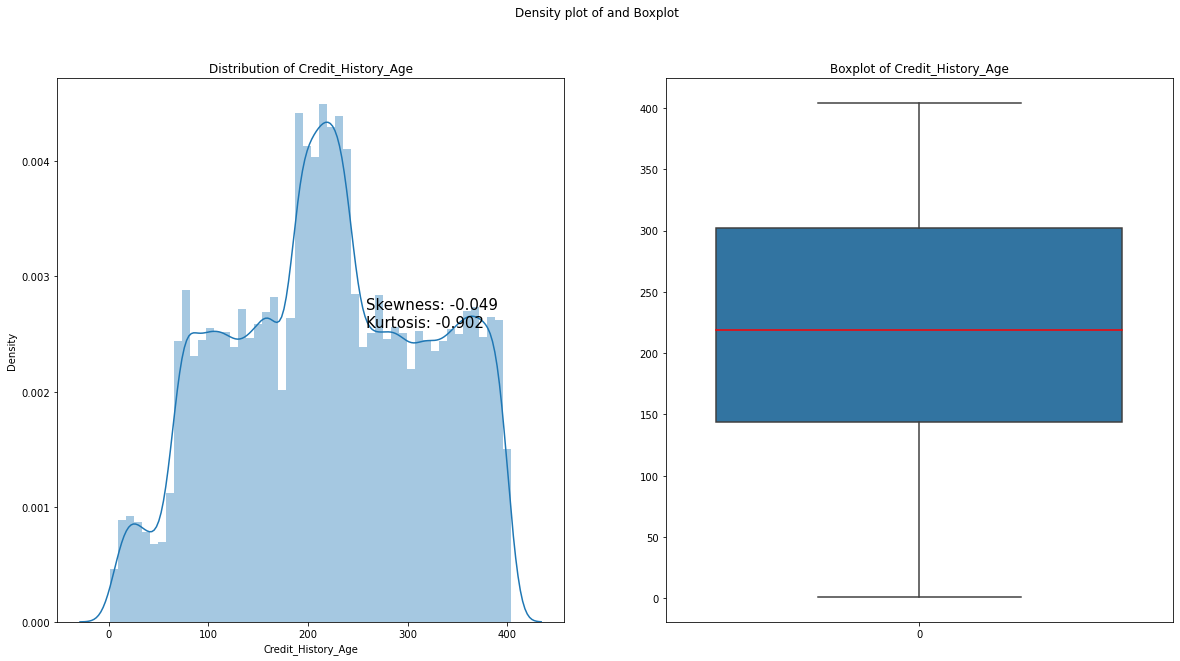

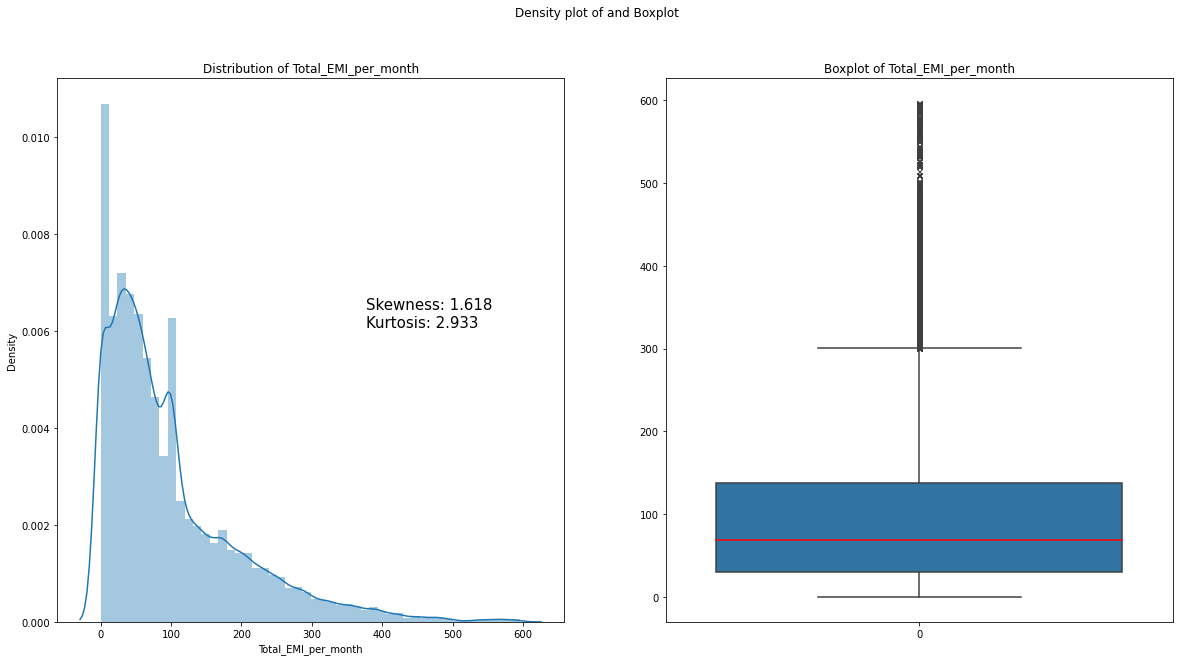

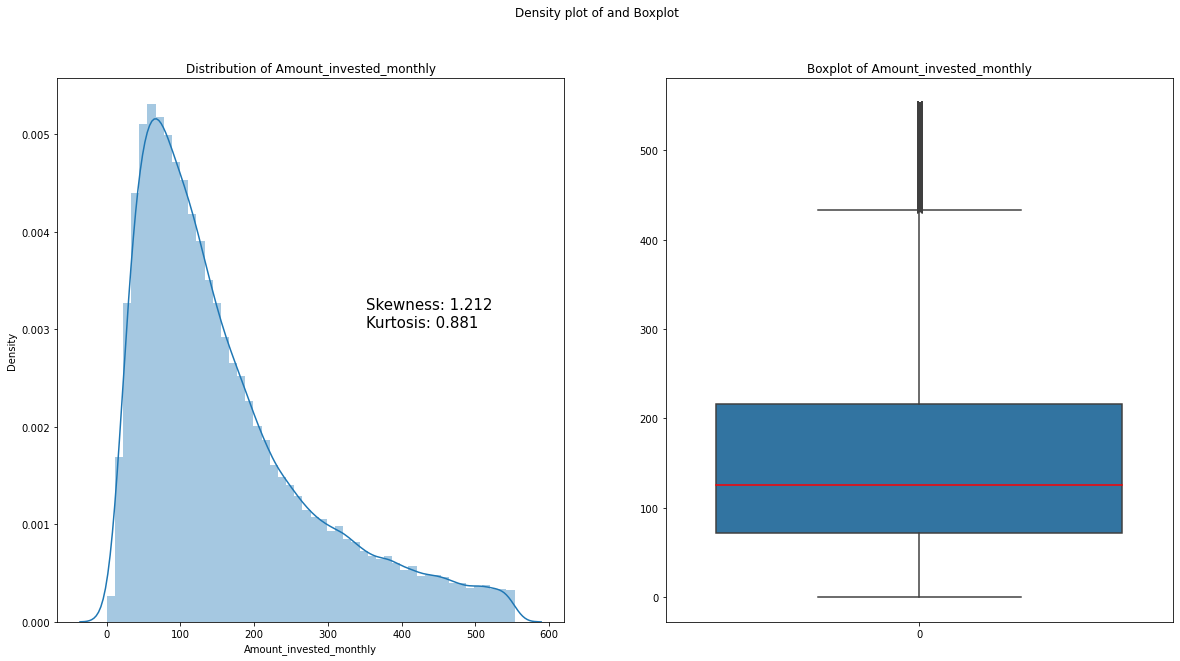

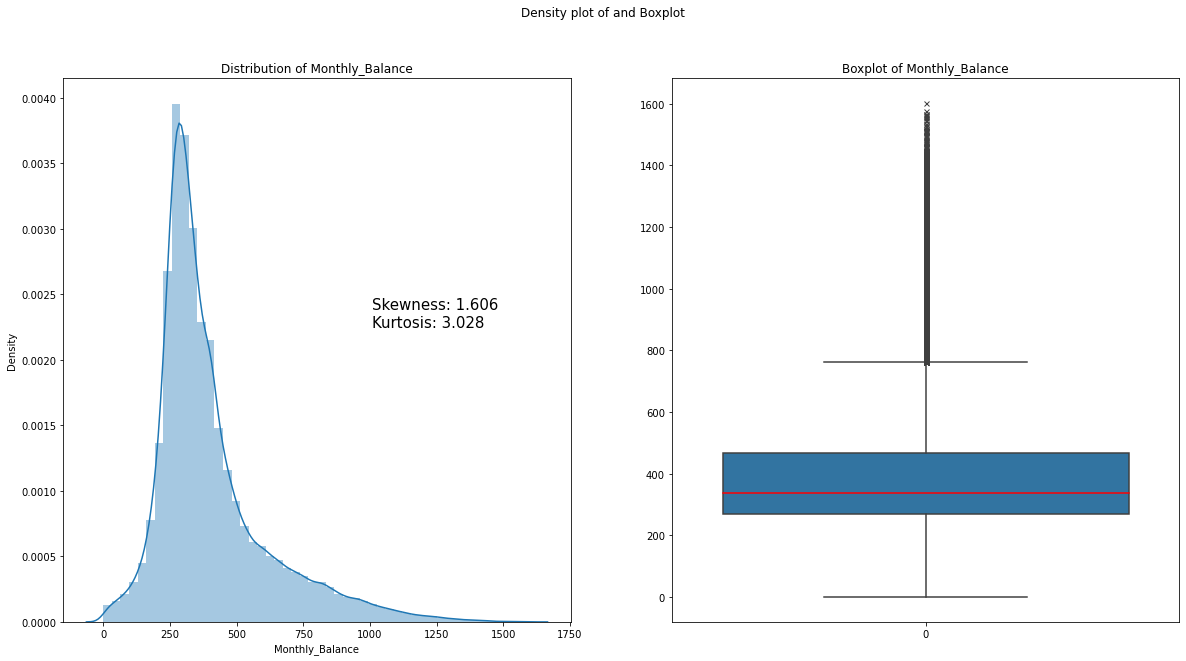

In [209]:
for col in df_train.select_dtypes(include='number').columns:
      plt.figure(figsize=(20,10))
      plt.subplot(121)
      sns.distplot(df_train[col])
      plt.title('Distribution of ' + col)
      plt.subplot(122)
      sns.boxplot(df_train[col],
                  medianprops={"color": "red"},
                  flierprops={"marker": "x"})
      plt.title('Boxplot of ' + col)
      plt.suptitle('Density plot of and Boxplot')
      text = '''
            Skewness: {0}
            Kurtosis: {1}
             '''.format(round(df_train[col].skew(), 3), round(df_train[col].kurtosis(),3))
      plt.figtext(0.3, 0.6, text, horizontalalignment='left', verticalalignment='top', fontsize = 15)
      plt.show()

Most of the data is substantionally or moderately skewed hence we need to transform them.

## Data Preprocessing

In [210]:
df_train.var()

Age                         1.158851e+02
Annual_Income               1.213985e+09
Monthly_Inhand_Salary       1.016012e+07
Num_Bank_Accounts           6.725094e+00
Num_Credit_Card             4.272791e+00
Interest_Rate               7.641085e+01
Num_of_Loan                 5.984659e+00
Delay_from_due_date         1.568514e+02
Num_of_Delayed_Payment      3.531504e+01
Changed_Credit_Limit        3.931518e+01
Num_Credit_Inquiries        1.447681e+01
Outstanding_Debt            1.334323e+06
Credit_Utilization_Ratio    2.618241e+01
Credit_History_Age          9.936049e+03
Total_EMI_per_month         9.574381e+03
Amount_invested_monthly     1.445630e+04
Monthly_Balance             4.521083e+04
dtype: float64

Due to the high variance on the Annual Income and the Monthly Salary we need to transform these columns. We use log transformation for high variance.

In [211]:
# Feature to transform
log_trans_col = ['Annual_Income', 'Monthly_Inhand_Salary']

# Defining log transformer
log_transformer = FunctionTransformer(np.log1p)

for col in log_trans_col:
    df_train[col] = log_transformer.fit_transform(df_train[col])

For the rest of the data we use Power Transformation to make the date more like Gaussian-like.

In [212]:
# Features to transform
pt_trans_col = ['Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
                'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries']

# Defining Power Transformer
pt_transformer = PowerTransformer(method = 'yeo-johnson', standardize = True)

for col in pt_trans_col:
    df_train[col] = pt_transformer.fit_transform(df_train[col].values.reshape(-1,1))

Ordinal encoding

In [213]:
ord_enc_cols = ['Payment_Behaviour', 'Credit_Score','Credit_Mix', 'Payment_of_Min_Amount']
ord_encoder = OrdinalEncoder()
for col in ord_enc_cols:
    df_train[col] = ord_encoder.fit_transform(df_train[col].values.reshape(-1,1))

One Hot encoding

In [214]:
dummy_cols = ['Occupation'] # 'Credit_Mix', 'Payment_of_Min_Amount'

for col in dummy_cols:
    encoded = pd.get_dummies(df_train[col], prefix=col)
    df_train = pd.concat((df_train, encoded), axis=1).drop(col, axis=1)


In [215]:
freq_map = df_train['Type_of_Loan'].value_counts(normalize=True).to_dict()
df_train['Type_of_Loan'] = df_train['Type_of_Loan'].map(freq_map)

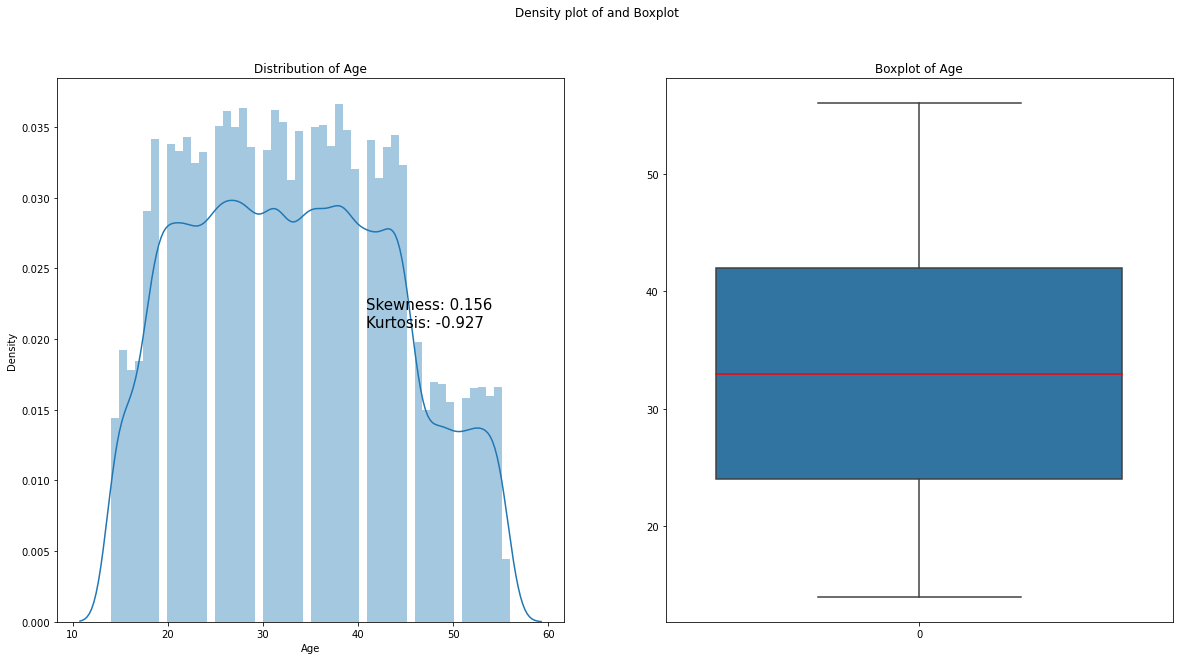

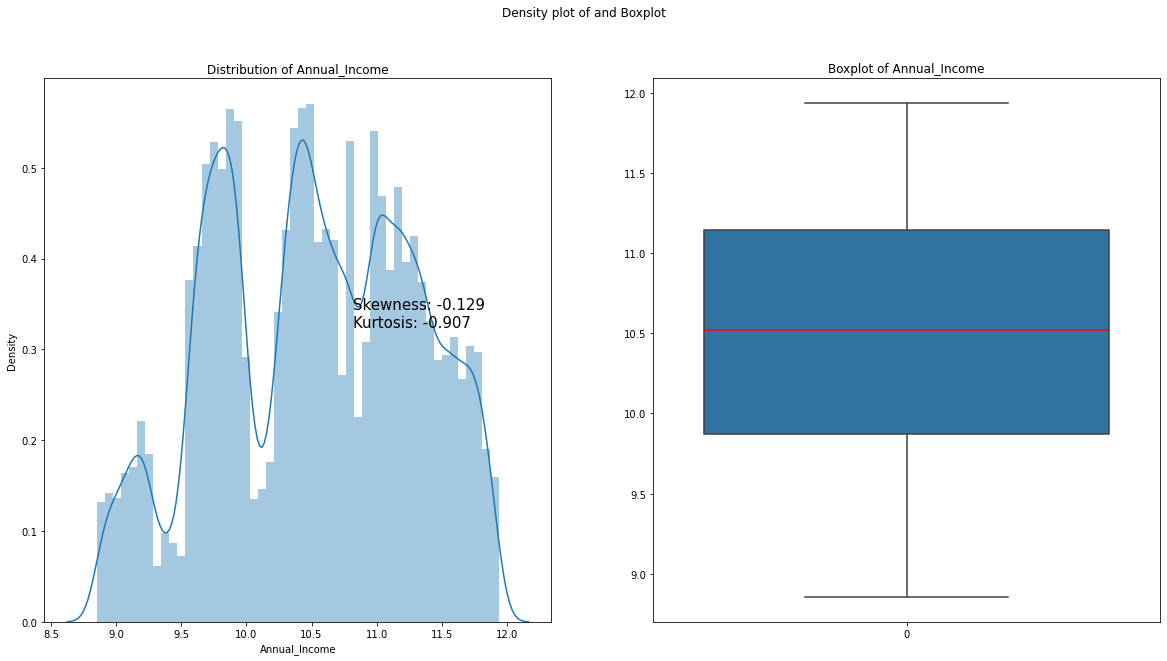

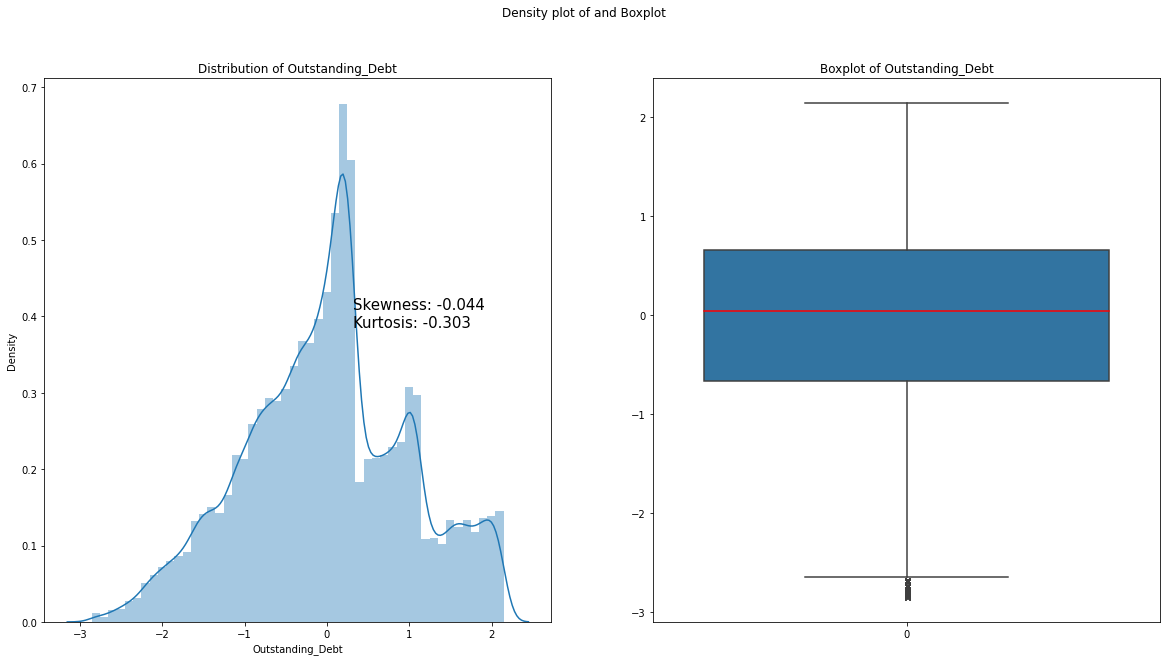

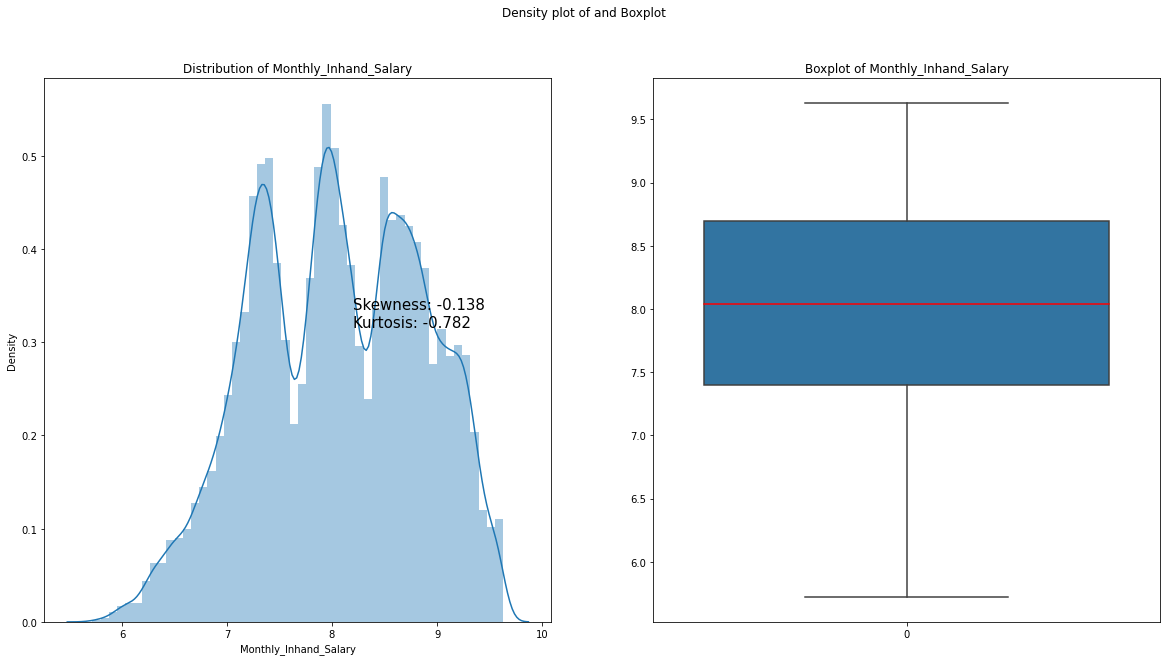

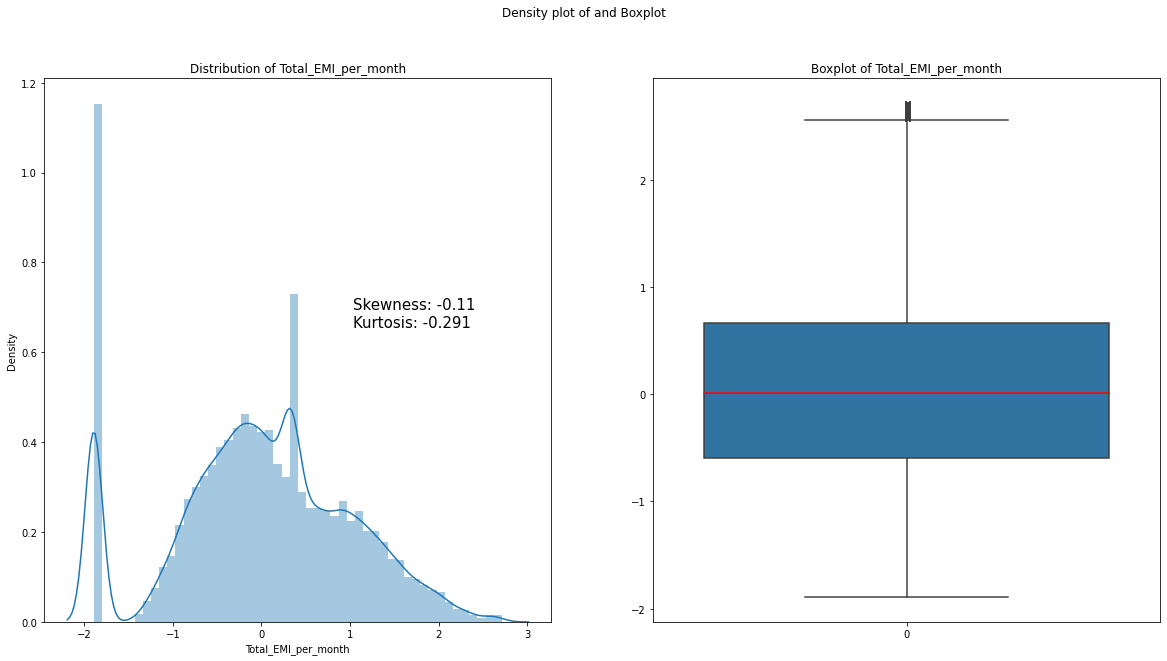

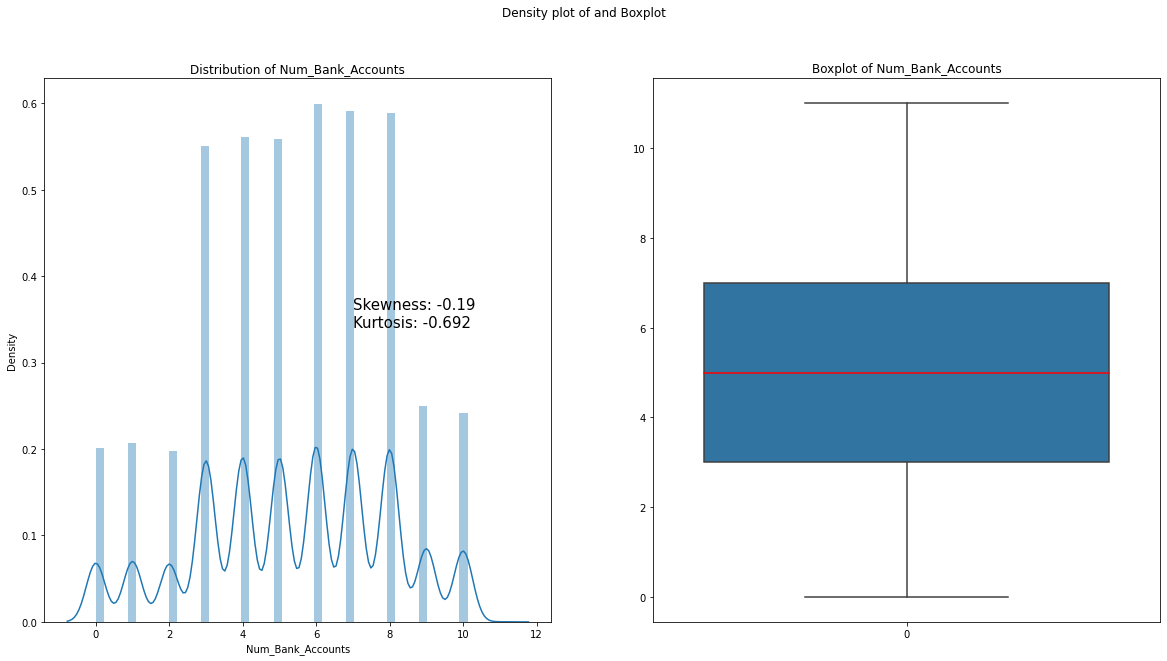

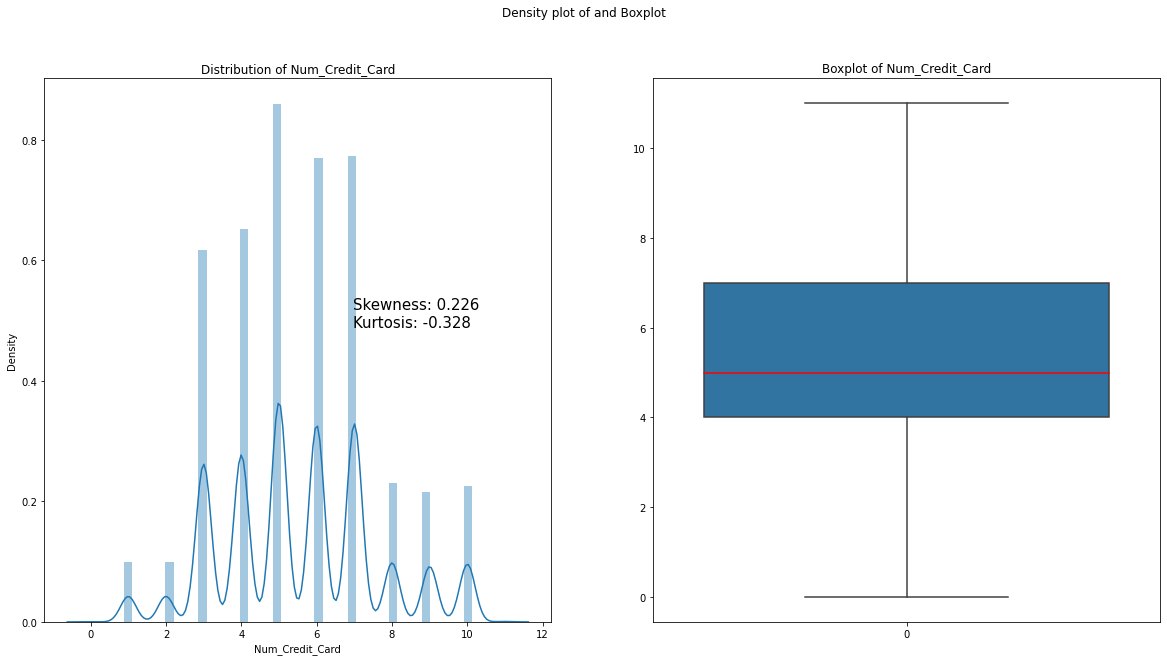

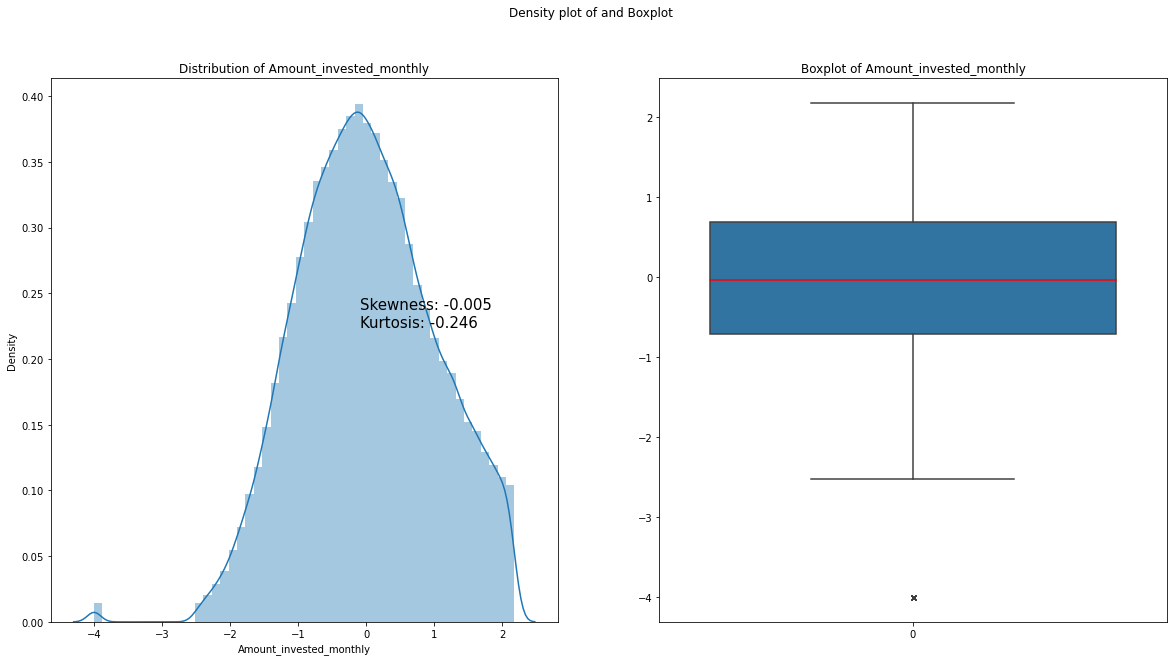

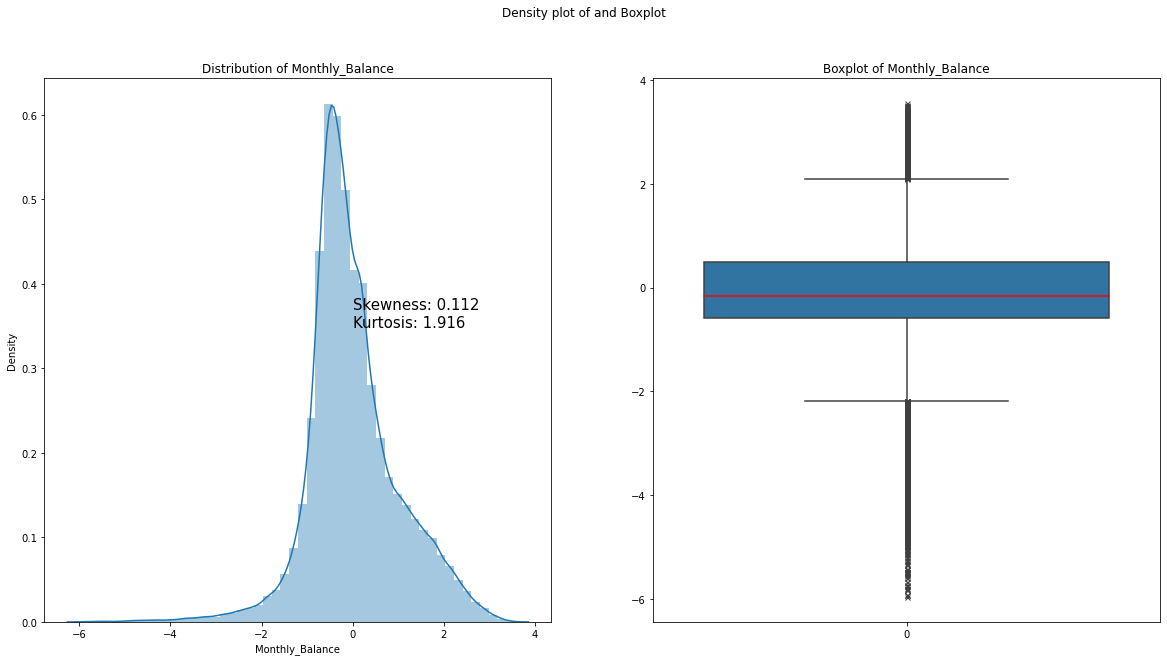

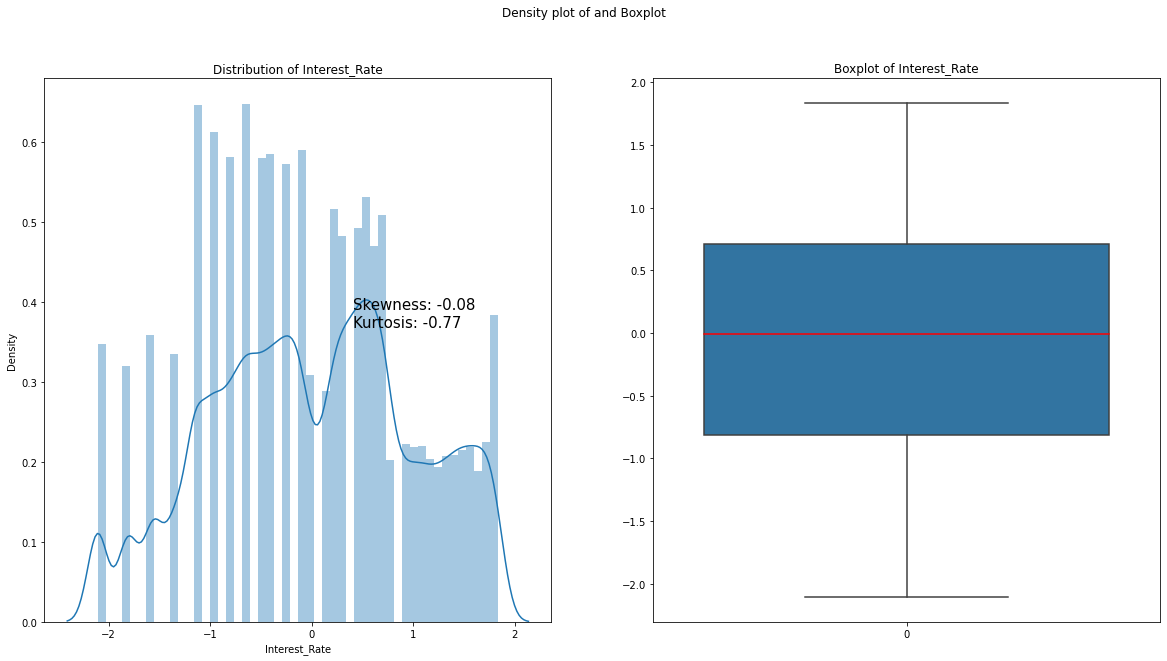

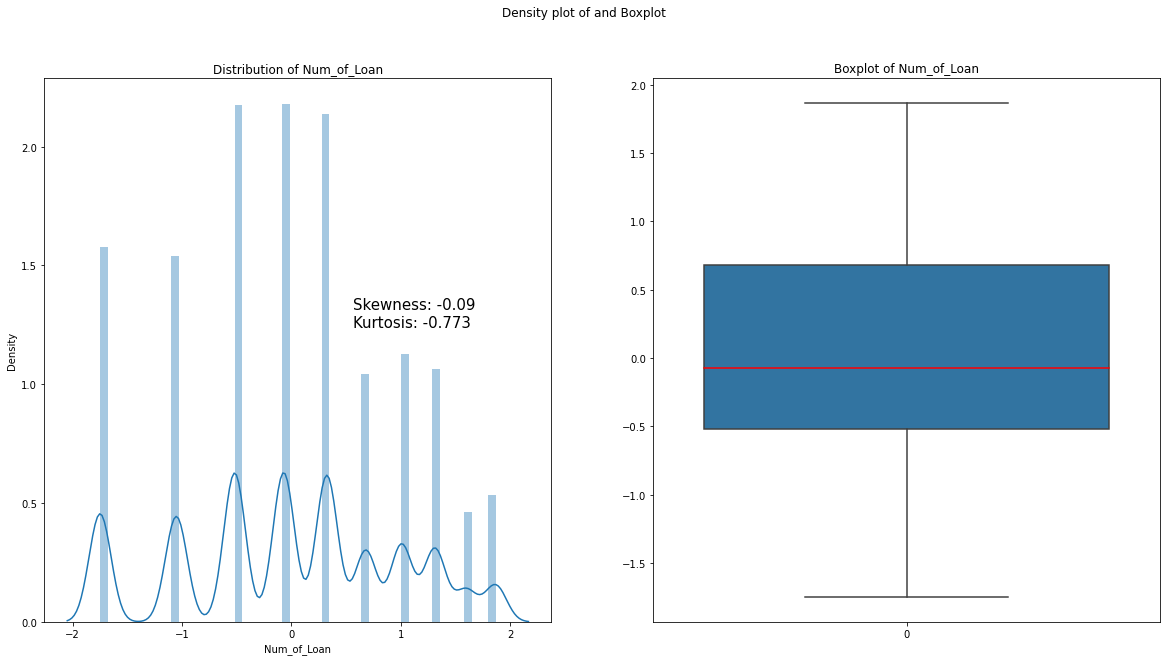

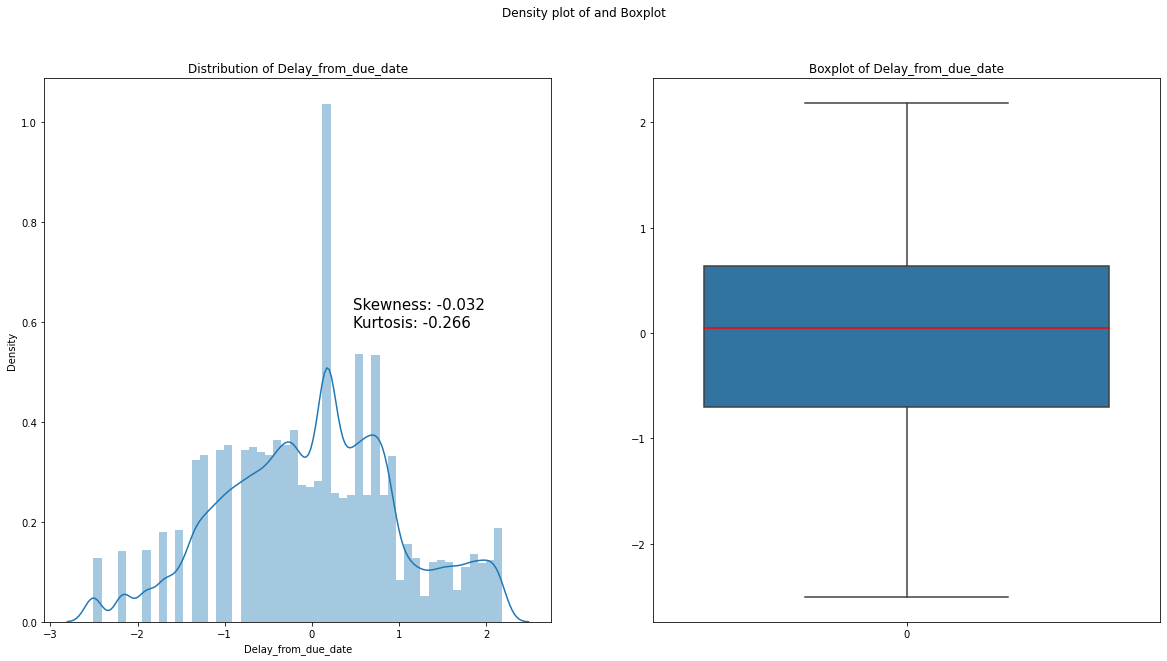

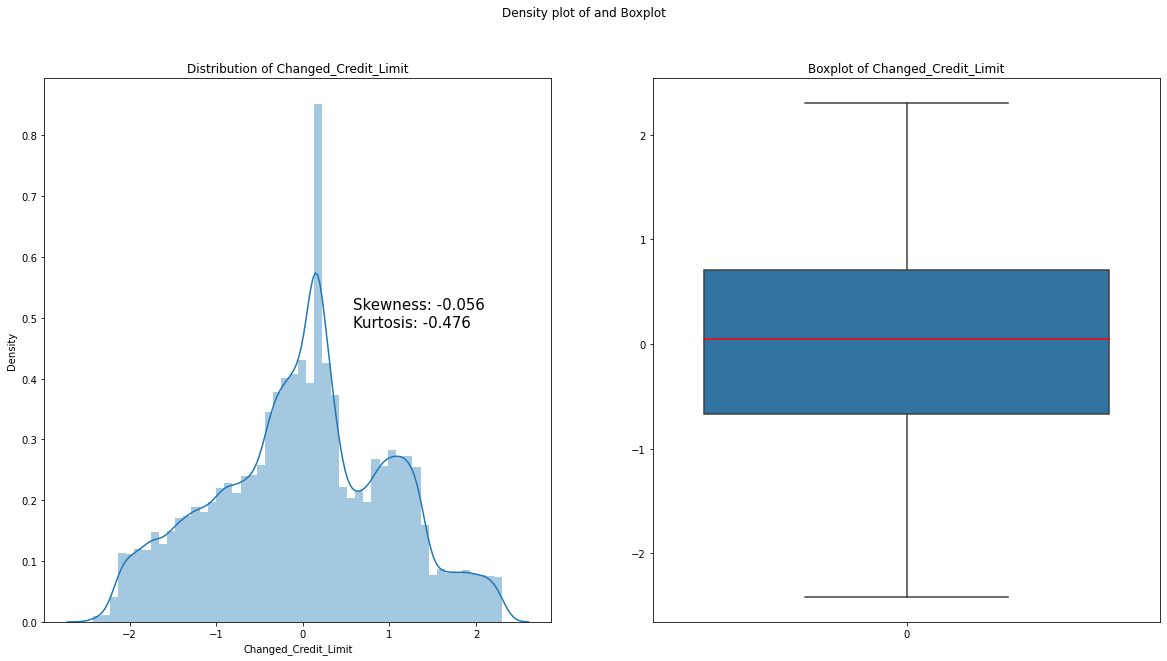

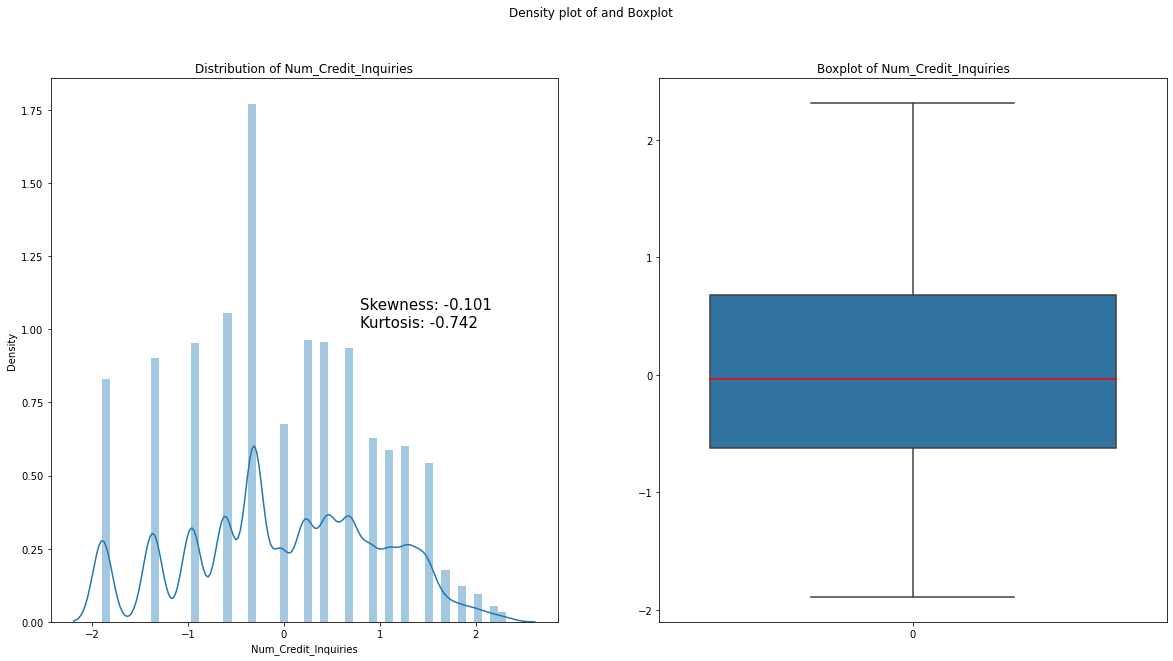

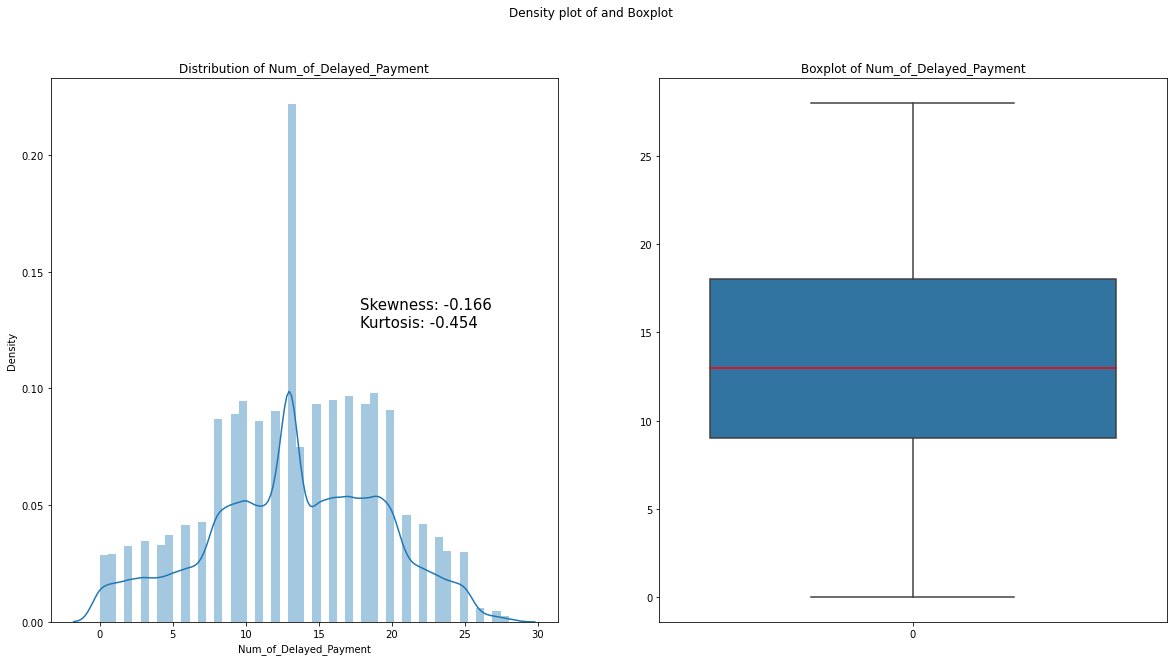

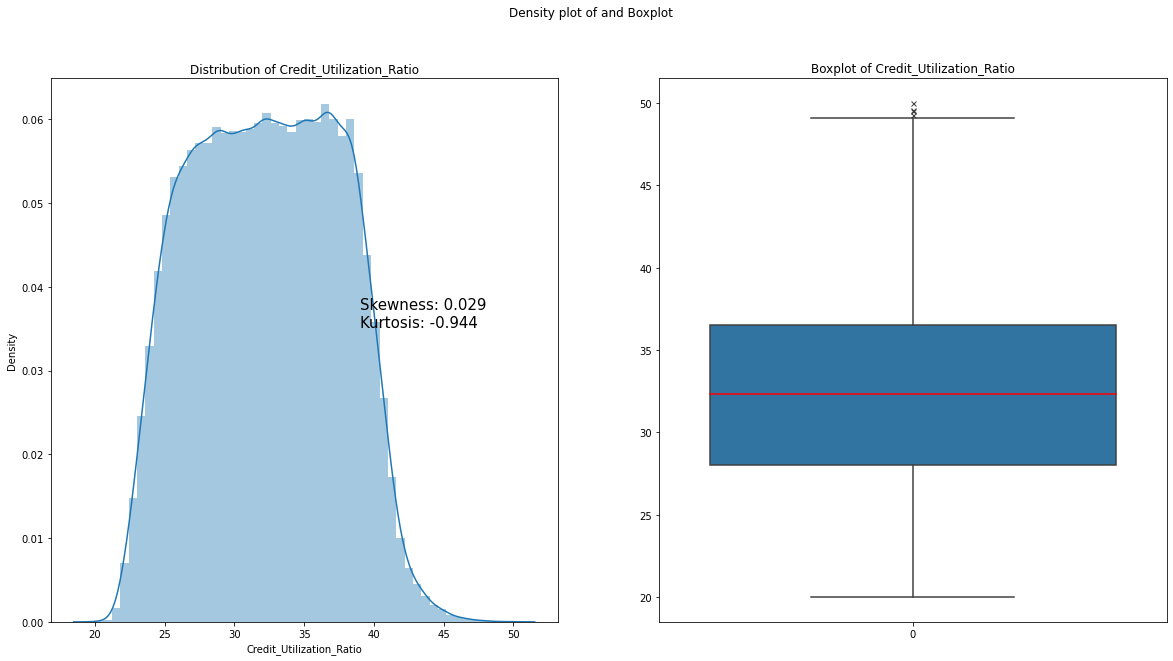

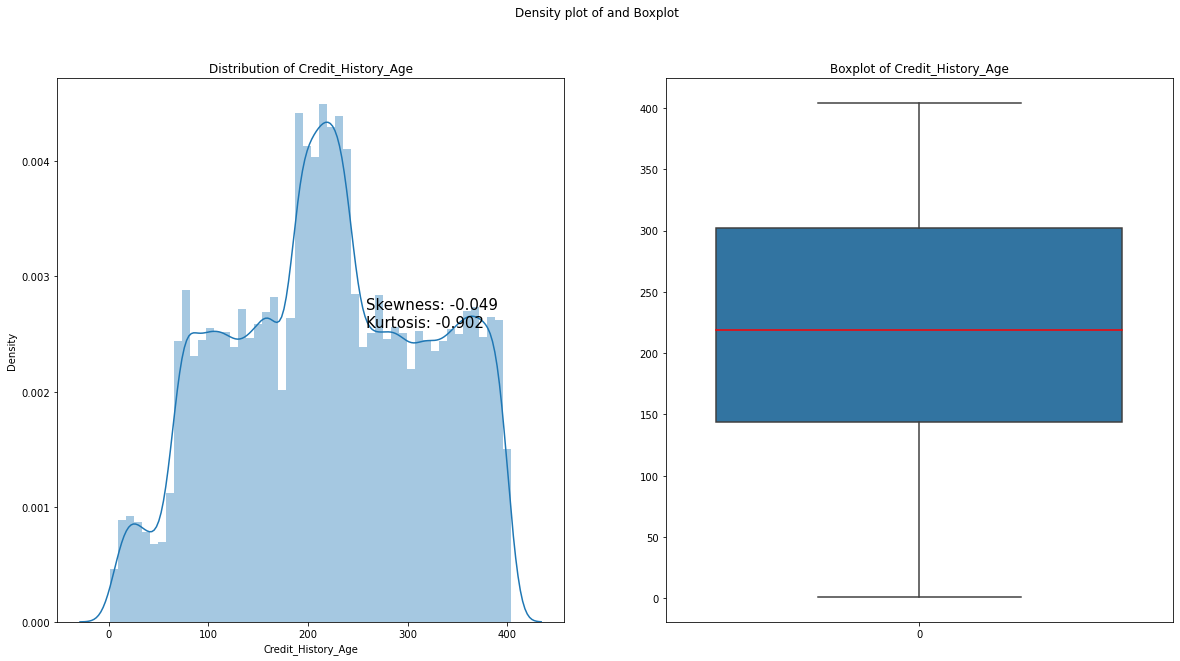

In [216]:
numeric_cols = ['Age', 'Annual_Income','Outstanding_Debt', 'Monthly_Inhand_Salary', 'Total_EMI_per_month',
                'Num_Bank_Accounts', 'Num_Credit_Card', 'Amount_invested_monthly', 'Monthly_Balance',
                'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                'Num_of_Delayed_Payment', 'Credit_Utilization_Ratio', 'Credit_History_Age']

for col in numeric_cols:
      plt.figure(figsize=(20,10))
      plt.subplot(121)
      sns.distplot(df_train[col])
      plt.title('Distribution of ' + col)
      plt.subplot(122)
      sns.boxplot(df_train[col],
                  medianprops={"color": "red"},
                  flierprops={"marker": "x"})
      plt.title('Boxplot of ' + col)
      plt.suptitle('Density plot of and Boxplot')
      text = '''
            Skewness: {0}
            Kurtosis: {1}
             '''.format(round(df_train[col].skew(), 3), round(df_train[col].kurtosis(),3))
      plt.figtext(0.3, 0.6, text, horizontalalignment='left', verticalalignment='top', fontsize = 15)
      plt.show()

## Model Training

In [264]:
X = df_train.drop(columns=['Customer_ID', 'Age', 'Month', 'Type_of_Loan', 'Credit_Score'])
y = df_train['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.3,
                                                    stratify = y)


In [270]:
def train_Evaluate(model, x,y,xt,yt):
    model.fit(x,y)
    y_pred = model.predict(xt)
    print('The prediction for the model {} is: '.format(str(model)))
    print(classification_report(yt,y_pred))
    print('-------Accuracy Score --------')
    print(accuracy_score(y_test,y_pred))
    print('\n')

#acc = accuracy_score(y_test,y_pred)
#precision = precision_score(y_test,y_pred,average='micro')
#recall = recall_score(y_test,y_pred,average='micro')
#f1 = f1_score(y_test,y_pred,average='micro')

models = [LogisticRegression(), PassiveAggressiveClassifier(), SGDClassifier(), RidgeClassifier(), KNeighborsClassifier(),
          DecisionTreeClassifier(), GaussianNB(), BernoulliNB(), AdaBoostClassifier(), GradientBoostingClassifier(),
          ExtraTreesClassifier(), MLPClassifier(), HistGradientBoostingClassifier()]

for model in models:
    train_Evaluate(model, X_train, y_train, X_test, y_test)

The prediction for the model LogisticRegression() is: 
              precision    recall  f1-score   support

         0.0       0.57      0.42      0.48      5349
         1.0       0.64      0.49      0.55      8699
         2.0       0.64      0.77      0.70     15952

    accuracy                           0.63     30000
   macro avg       0.62      0.56      0.58     30000
weighted avg       0.62      0.63      0.62     30000

-------Accuracy Score --------
0.6276


The prediction for the model PassiveAggressiveClassifier() is: 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      5349
         1.0       0.30      0.96      0.46      8699
         2.0       0.70      0.10      0.17     15952

    accuracy                           0.33     30000
   macro avg       0.33      0.35      0.21     30000
weighted avg       0.46      0.33      0.22     30000

-------Accuracy Score --------
0.32963333333333333


The prediction for the mod

In [266]:
scaler = StandardScaler()
features = X_train.columns
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train,columns=features)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test,columns=features)

for model in models:
    train_Evaluate(model, X_train_scaled, y_train, X_test_scaled, y_test)

In [252]:
kf = KFold(n_splits = 10,
           shuffle = True)

params_dt = {   'max_depth' : [2,3,4,5,6,7],
                'min_samples_leaf' : [0.04,0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2],
                'max_features' : [0.2, 0.4, 0.6, 0.8, 1.0, 1.2],
                'criterion' : ['gini', 'entropy', 'log_loss']
            }

dt = DecisionTreeClassifier()

grid_dt = GridSearchCV(estimator = dt,
                       param_grid = params_dt,
                       scoring = 'accuracy',
                       cv = kf,
                       n_jobs = -1)

grid_dt.fit(X_train, y_train)
y_pred = grid_dt.predict(X_test)
print(classification_report(y_test,y_pred))
print('-------Accuracy Score --------')
print(accuracy_score(y_test,y_pred))
print('Best score: ', grid_dt.best_score_)
print('Best parameters are: ', grid_dt.best_params_)


              precision    recall  f1-score   support

         0.0       0.57      0.48      0.52      5349
         1.0       0.66      0.63      0.64      8699
         2.0       0.70      0.76      0.73     15952

    accuracy                           0.67     30000
   macro avg       0.65      0.62      0.63     30000
weighted avg       0.67      0.67      0.67     30000

-------Accuracy Score --------
0.6716666666666666
Best score:  0.6704714285714286
Best parameters are:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 0.04}


In [273]:
params_etc = {  'n_estimators' : [100, 1000, 10],
                'max_depth' : np.linspace(2,30,2),
                'min_samples_leaf' : np.linspace(0, 1, 20),
                'criterion' : ['gini', 'entropy', 'log_loss'],
                'max_features' : ['sqrt', 'log2'],
                #'oob_score' : [True],
                #'bootstrap' : [True]
            }

etc = ExtraTreesClassifier()

grid_etc = RandomizedSearchCV(estimator = etc,
                              param_distributions = params_etc,
                              scoring = 'accuracy',
                              cv = kf,
                              n_jobs = -1)

grid_etc.fit(X_train_scaled, y_train)
y_pred = grid_etc.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
print('-------Accuracy Score --------')
print(accuracy_score(y_test,y_pred))
print('Best score: ', grid_etc.best_score_)
print('Best parameters are: ', grid_etc.best_params_)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      5349
         1.0       0.00      0.00      0.00      8699
         2.0       0.53      1.00      0.69     15952

    accuracy                           0.53     30000
   macro avg       0.18      0.33      0.23     30000
weighted avg       0.28      0.53      0.37     30000

-------Accuracy Score --------
0.5317333333333333
Best score:  0.5317428571428572
Best parameters are:  {'n_estimators': 1000, 'min_samples_leaf': 0.21052631578947367, 'max_features': 'sqrt', 'max_depth': 2.0, 'criterion': 'gini'}


In [285]:
params_hist = { 'max_depth' : np.linspace(2,30,2),
                'min_samples_leaf' : np.linspace(0, 100, 20),
                'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                'max_iter' : [100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900]
            }

hist = HistGradientBoostingClassifier()

grid_hist = RandomizedSearchCV(estimator = hist,
                              param_distributions = params_hist,
                              scoring = 'accuracy',
                              cv = kf,
                              n_jobs = -1)

grid_hist.fit(X_train_scaled, y_train)
y_pred = grid_hist.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
print('-------Accuracy Score --------')
print(accuracy_score(y_test,y_pred))
print('Best score: ', grid_hist.best_score_)
print('Best parameters are: ', grid_hist.best_params_)


              precision    recall  f1-score   support

         0.0       0.73      0.70      0.71      5349
         1.0       0.77      0.77      0.77      8699
         2.0       0.79      0.80      0.79     15952

    accuracy                           0.77     30000
   macro avg       0.76      0.76      0.76     30000
weighted avg       0.77      0.77      0.77     30000

-------Accuracy Score --------
0.7734666666666666
Best score:  0.7645142857142857
Best parameters are:  {'min_samples_leaf': 84.21052631578948, 'max_iter': 600, 'max_depth': 30.0, 'learning_rate': 0.3}
